## 1. Import the Lib

In [2]:
# Basic lib
import numpy as np
import pandas as pd

# profiling lib
#import pandas_profiling

# Grafh - chart  lib
import matplotlib.pyplot as pylt
%matplotlib inline
import seaborn as sns
import pylab

# Stats lib
import scipy.stats as stats

# VIF lib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Iteration lib
import itertools

# Train-test split
from sklearn.model_selection import train_test_split

# Validation lib
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Feature reduction lib
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression

# Linear Regression lib
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import Ridge,Lasso

# Grid-search lib
from sklearn.model_selection import GridSearchCV

# Decision Tree lib
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
import pydotplus as pdot
import os
from IPython.display import Image

# Ensamble lib
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

# Standardize lib
from sklearn.preprocessing import StandardScaler

# KNN lib
from sklearn.neighbors import KNeighborsRegressor

# SVM lib
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

# ANN lib
from sklearn.neural_network import MLPRegressor

# Text Minning Lib
import re

## 2. Importing the data

In [3]:
data = pd.read_excel('c:/my_computer/data_file/Data Set.xlsx')

In [4]:
data

custid  region  townsize  gender  age  agecat birthmonth  ed  \
0     3964-QJWTRG-NPN       1       2.0       1   20       2  September  15   
1     0648-AIPJSP-UVM       5       5.0       0   22       2        May  17   
2     5195-TLUDJE-HVO       3       4.0       1   67       6       June  14   
3     4459-VLPQUH-3OL       4       3.0       0   23       2        May  16   
4     8158-SMTQFB-CNO       2       2.0       0   26       3       July  16   
...               ...     ...       ...     ...  ...     ...        ...  ..   
4995  3675-GZFGOT-QJN       2       2.0       0   68       6    January  10   
4996  4699-LEPCCE-3UD       3       3.0       0   51       5        May  14   
4997  8485-LLUICH-CVV       4       5.0       0   75       6     August  17   
4998  9325-URAAUT-7FA       1       1.0       0   47       4   December  19   
4999  8027-EXDZBF-OGR       3       5.0       1   41       4        May  10   

      edcat  jobcat  ...  owncd  ownpda  ownpc  ownipod  owngame  ownfax  \
0         3       1  ...      0       0      0        1        1       0   
1         4       2  ...      1       1      1        1        1       1   
2         2       2  ...      1       0      0        0        0       0   
3         3       2  ...      1       0      1        1        1       0   
4         3       2  ...      1       0      1        0        1       0   
...     ...     ...  ...    ...     ...    ...      ...      ...     ...   
4995      1       1  ...      1       0      0        0        0       0   
4996      2       1  ...      1       0      0        0        0       0   
4997      4       1  ...      1       1      0        0        0       0   
4998      4       2  ...      1       0      1        1        1       0   
4999      1       5  ...      1       0      0        0        0       0   

      news  response_01  response_02  response_03  
0        0            0            1            0  
1        1            0            0            0  
2        1            0            0            0  
3        1            1            0            0  
4        0            0            1            0  
...    ...          ...          ...          ...  
4995     1            0            0            0  
4996     0            0            0            0  
4997     1            0            0            0  
4998     1            0            0            0  
4999     0            0            0            0  

[5000 rows x 130 columns]

## 3. Drived total spend from both the cards

In [5]:
data['Totalspent'] = data['cardspent'] + data['card2spent']

In [6]:
data.head()

custid  region  townsize  gender  age  agecat birthmonth  ed  \
0  3964-QJWTRG-NPN       1       2.0       1   20       2  September  15   
1  0648-AIPJSP-UVM       5       5.0       0   22       2        May  17   
2  5195-TLUDJE-HVO       3       4.0       1   67       6       June  14   
3  4459-VLPQUH-3OL       4       3.0       0   23       2        May  16   
4  8158-SMTQFB-CNO       2       2.0       0   26       3       July  16   

   edcat  jobcat  ...  ownpda  ownpc  ownipod  owngame  ownfax  news  \
0      3       1  ...       0      0        1        1       0     0   
1      4       2  ...       1      1        1        1       1     1   
2      2       2  ...       0      0        0        0       0     1   
3      3       2  ...       0      1        1        1       0     1   
4      3       2  ...       0      1        0        1       0     0   

   response_01  response_02  response_03  Totalspent  
0            0            1            0      149.46  
1            0            0            0       77.54  
2            0            0            0      359.97  
3            1            0            0      359.41  
4            0            1            0      507.83  

[5 rows x 131 columns]

# 4. Data Analysis

In [7]:
# data dimension
data.shape

(5000, 131)

### 4.1. Redusing varibale based on business logic and logical analysis

In [8]:
column_list = ['''custid	region	townsize	gender	age	agecat	birthmonth	ed	edcat	jobcat	union	employ	empcat	retire	income	lninc	inccat	debtinc	creddebt	lncreddebt	othdebt	lnothdebt	default	jobsat	marital	spoused	spousedcat	reside	pets	pets_cats	pets_dogs	pets_birds	pets_reptiles	pets_small	pets_saltfish	pets_freshfish	homeown	hometype	address	addresscat	cars	carown	cartype	carvalue	carcatvalue	carbought	carbuy	commute	commutecat	commutetime	commutecar	commutemotorcycle	commutecarpool	commutebus	commuterail	commutepublic	commutebike	commutewalk	commutenonmotor	telecommute	reason	polview	polparty	polcontrib	vote	card	cardtype	cardbenefit	cardfee	cardtenure	cardtenurecat	card2	card2type	card2benefit	card2fee	card2tenure	card2tenurecat	cardspent	card2spent	active	bfast	tenure	churn	longmon	lnlongmon	longten	lnlongten	tollfree	tollmon	lntollmon	tollten	lntollten	equip	equipmon	lnequipmon	equipten	lnequipten	callcard	cardmon	lncardmon	cardten	lncardten	wireless	wiremon	lnwiremon	wireten	lnwireten	multline	voice	pager	internet	callid	callwait	forward	confer	ebill	owntv	hourstv	ownvcr	owndvd	owncd	ownpda	ownpc	ownipod	owngame	ownfax	news	response_01	response_02	response_03	Totalspent''']
column_list = np.str(column_list).split('	')
column_list = column_list[0]
column_list = column_list.split('\\t')
column_list[0] = 'custid'
column_list[-1] = 'Totalspent'
print(len(column_list))
print('---------------')
print(column_list)

131
---------------
['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'cardspent', 'card2spent',

In [9]:
object_col = '''active
addresscat
agecat
bfast
birthmonth
callcard
callid
callwait
carbought
carbuy
carcatvalue
card
card2
card2benefit
card2fee
card2tenurecat
card2type
cardbenefit
cardfee
cardtenurecat
cardtype
carown
cars
cartype
churn
commutebike
commutebus
commutecar
commutecarpool
commutecat
commutemotorcycle
commutenonmotor
commutepublic
commuterail
commutewalk
confer
default
ebill
edcat
empcat
equip
forward
gender
homeown
hometype
inccat
internet
jobcat
jobsat
marital
multline
news
owncd
owndvd
ownfax
owngame
ownipod
ownpc
ownpda
owntv
ownvcr
pager
polcontrib
polparty
polview
reason
region
response_01
response_02
response_03
retire
spousedcat
telecommute
tollfree
townsize
union
voice
vote
wireless'''

object_col = str(object_col).split('\n')
print(object_col)

['active', 'addresscat', 'agecat', 'bfast', 'birthmonth', 'callcard', 'callid', 'callwait', 'carbought', 'carbuy', 'carcatvalue', 'card', 'card2', 'card2benefit', 'card2fee', 'card2tenurecat', 'card2type', 'cardbenefit', 'cardfee', 'cardtenurecat', 'cardtype', 'carown', 'cars', 'cartype', 'churn', 'commutebike', 'commutebus', 'commutecar', 'commutecarpool', 'commutecat', 'commutemotorcycle', 'commutenonmotor', 'commutepublic', 'commuterail', 'commutewalk', 'confer', 'default', 'ebill', 'edcat', 'empcat', 'equip', 'forward', 'gender', 'homeown', 'hometype', 'inccat', 'internet', 'jobcat', 'jobsat', 'marital', 'multline', 'news', 'owncd', 'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager', 'polcontrib', 'polparty', 'polview', 'reason', 'region', 'response_01', 'response_02', 'response_03', 'retire', 'spousedcat', 'telecommute', 'tollfree', 'townsize', 'union', 'voice', 'vote', 'wireless']


In [10]:
int_col = '''cardmon
cardten
carvalue
commutetime
creddebt
debtinc
equipmon
equipten
hourstv
longmon
longten
othdebt
pets
pets_birds
pets_cats
pets_dogs
pets_freshfish
pets_reptiles
pets_saltfish
pets_small
reside
tenure
tollmon
tollten
wiremon
wireten'''

int_col = str(int_col).split('\n')
print(int_col)

['cardmon', 'cardten', 'carvalue', 'commutetime', 'creddebt', 'debtinc', 'equipmon', 'equipten', 'hourstv', 'longmon', 'longten', 'othdebt', 'pets', 'pets_birds', 'pets_cats', 'pets_dogs', 'pets_freshfish', 'pets_reptiles', 'pets_saltfish', 'pets_small', 'reside', 'tenure', 'tollmon', 'tollten', 'wiremon', 'wireten']


In [11]:
data_int = data.loc[:,int_col]

In [12]:
data_int.head()

cardmon  cardten  carvalue  commutetime  creddebt  debtinc  equipmon  \
0    14.25     60.0      14.3         22.0  1.200909     11.1     29.50   
1    16.00    610.0       6.8         29.0  1.222020     18.6     54.85   
2    23.00   1410.0      18.8         24.0  0.928620      9.9      0.00   
3    21.00    685.0       8.7         38.0  0.022800      5.7      0.00   
4    17.25    360.0      10.6         32.0  0.214659      1.7      0.00   

   equipten  hourstv  longmon  ...  pets_freshfish  pets_reptiles  \
0     126.1       13     6.50  ...               0              0   
1    1975.0       18     8.90  ...               6              0   
2       0.0       21    28.40  ...               0              0   
3       0.0       26     6.00  ...               0              0   
4       0.0       27     3.05  ...               0              0   

   pets_saltfish  pets_small  reside  tenure  tollmon  tollten  wiremon  \
0              0           0       3       5     29.0   161.05     0.00   
1              0           0       2      39      0.0     0.00    45.65   
2              0           0       3      65      0.0     0.00     0.00   
3              0           0       5      36      0.0     0.00     0.00   
4              0           0       4      21     16.5   387.70    19.05   

   wireten  
0     0.00  
1  1683.55  
2     0.00  
3     0.00  
4   410.80  

[5 rows x 26 columns]

In [13]:
data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
cardmon           5000 non-null float64
cardten           4998 non-null float64
carvalue          5000 non-null float64
commutetime       4998 non-null float64
creddebt          5000 non-null float64
debtinc           5000 non-null float64
equipmon          5000 non-null float64
equipten          5000 non-null float64
hourstv           5000 non-null int64
longmon           5000 non-null float64
longten           4997 non-null float64
othdebt           5000 non-null float64
pets              5000 non-null int64
pets_birds        5000 non-null int64
pets_cats         5000 non-null int64
pets_dogs         5000 non-null int64
pets_freshfish    5000 non-null int64
pets_reptiles     5000 non-null int64
pets_saltfish     5000 non-null int64
pets_small        5000 non-null int64
reside            5000 non-null int64
tenure            5000 non-null int64
tollmon           5000 non-null flo

In [14]:
data_obj = data.loc[:,object_col]

In [15]:
data_obj.head()

active  addresscat  agecat  bfast birthmonth  callcard  callid  callwait  \
0       0           1       2      3  September         1       0         1   
1       1           1       2      1        May         1       1         0   
2       0           5       6      3       June         1       0         0   
3       1           2       2      1        May         1       0         0   
4       1           2       3      3       July         1       1         1   

   carbought  carbuy  ...  response_03  retire  spousedcat  telecommute  \
0          0       0  ...            0       0          -1            0   
1          0       0  ...            0       0          -1            1   
2          0       1  ...            0       0           2            0   
3          0       1  ...            0       0           4            0   
4          0       1  ...            0       0           2            0   

   tollfree  townsize  union  voice  vote  wireless  
0         1       2.0      1      1     1         0  
1         0       5.0      0      1     0         1  
2         0       4.0      0      0     0         0  
3         0       3.0      0      0     0         0  
4         1       2.0      0      1     0         1  

[5 rows x 79 columns]

In [16]:
data_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 79 columns):
active               5000 non-null int64
addresscat           5000 non-null int64
agecat               5000 non-null int64
bfast                5000 non-null int64
birthmonth           5000 non-null object
callcard             5000 non-null int64
callid               5000 non-null int64
callwait             5000 non-null int64
carbought            5000 non-null int64
carbuy               5000 non-null int64
carcatvalue          5000 non-null int64
card                 5000 non-null int64
card2                5000 non-null int64
card2benefit         5000 non-null int64
card2fee             5000 non-null int64
card2tenurecat       5000 non-null int64
card2type            5000 non-null int64
cardbenefit          5000 non-null int64
cardfee              5000 non-null int64
cardtenurecat        5000 non-null int64
cardtype             5000 non-null int64
carown               5000 non-n

In [17]:
Totalspent = pd.DataFrame(data['Totalspent'])

In [18]:
Totalspent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
Totalspent    5000 non-null float64
dtypes: float64(1)
memory usage: 39.2 KB


### 4.2. Summary details

In [19]:
# continous data
def int_summary(x):
    return pd.Series([x.count(), x.isna().sum().round(4), x.sum(), x.mean(), x.median(), x.std(),
                     x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.25)
                     , x.quantile(0.50), x.quantile(0.75), x.quantile(0.95), x.quantile(0.99), x.max()],
                     index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 
                            'MIN', 'P1' , 'P5' ,'P25' ,'P50' ,'P75','P95' ,'P99' ,'MAX'])

def obj_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(),x.isna().sum(),Mode.iloc[0, 0], Mode.iloc[0, 1],round(Mode.iloc[0, 1] * 100/x.count(), 2)],
                     index=['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [20]:
data_int.apply(int_summary).T

N  NMISS           SUM        MEAN      MEDIAN  \
cardmon         5000.0    0.0  7.721925e+04   15.443850   13.750000   
cardten         4998.0    2.0  3.600951e+06  720.478391  425.000000   
carvalue        5000.0    0.0  1.161629e+05   23.232580   17.000000   
commutetime     4998.0    2.0  1.266770e+05   25.345538   25.000000   
creddebt        5000.0    0.0  9.286628e+03    1.857326    0.926437   
debtinc         5000.0    0.0  4.977080e+04    9.954160    8.800000   
equipmon        5000.0    0.0  6.495655e+04   12.991310    0.000000   
equipten        5000.0    0.0  2.350882e+06  470.176400    0.000000   
hourstv         5000.0    0.0  9.822500e+04   19.645000   20.000000   
longmon         5000.0    0.0  6.735725e+04   13.471450    9.550000   
longten         4997.0    3.0  3.542232e+06  708.871753  350.000000   
othdebt         5000.0    0.0  1.827230e+04    3.654460    2.098540   
pets            5000.0    0.0  1.533700e+04    3.067400    2.000000   
pets_birds      5000.0    0.0  5.520000e+02    0.110400    0.000000   
pets_cats       5000.0    0.0  2.502000e+03    0.500400    0.000000   
pets_dogs       5000.0    0.0  1.962000e+03    0.392400    0.000000   
pets_freshfish  5000.0    0.0  9.237000e+03    1.847400    0.000000   
pets_reptiles   5000.0    0.0  2.780000e+02    0.055600    0.000000   
pets_saltfish   5000.0    0.0  2.330000e+02    0.046600    0.000000   
pets_small      5000.0    0.0  5.730000e+02    0.114600    0.000000   
reside          5000.0    0.0  1.102000e+04    2.204000    2.000000   
tenure          5000.0    0.0  1.910240e+05   38.204800   38.000000   
tollmon         5000.0    0.0  6.632225e+04   13.264450    0.000000   
tollten         5000.0    0.0  2.889163e+06  577.832510    0.000000   
wiremon         5000.0    0.0  5.350595e+04   10.701190    0.000000   
wireten         5000.0    0.0  2.109923e+06  421.984610    0.000000   

                        STD           VAR  MIN         P1         P5  \
cardmon           15.007569  2.252271e+02  0.0   0.000000   0.000000   
cardten          922.225527  8.504999e+05  0.0   0.000000   0.000000   
carvalue          21.231637  4.507824e+02 -1.0  -1.000000  -1.000000   
commutetime        5.879149  3.456439e+01  8.0  13.000000  16.000000   
creddebt           3.415732  1.166722e+01  0.0   0.033160   0.101088   
debtinc            6.399783  4.095723e+01  0.0   0.700000   1.900000   
equipmon          19.212943  3.691372e+02  0.0   0.000000   0.000000   
equipten         912.220624  8.321465e+05  0.0   0.000000   0.000000   
hourstv            5.165609  2.668351e+01  0.0   0.000000  12.000000   
longmon           12.773381  1.631593e+02  0.9   1.850000   2.900000   
longten          979.291072  9.590110e+05  0.9   2.400000  12.620000   
othdebt            5.395172  2.910788e+01  0.0   0.114299   0.287692   
pets               3.414497  1.165879e+01  0.0   0.000000   0.000000   
pets_birds         0.494227  2.442607e-01  0.0   0.000000   0.000000   
pets_cats          0.860783  7.409480e-01  0.0   0.000000   0.000000   
pets_dogs          0.796084  6.337490e-01  0.0   0.000000   0.000000   
pets_freshfish     3.074801  9.454404e+00  0.0   0.000000   0.000000   
pets_reptiles      0.325776  1.061299e-01  0.0   0.000000   0.000000   
pets_saltfish      0.469545  2.204725e-01  0.0   0.000000   0.000000   
pets_small         0.568798  3.235315e-01  0.0   0.000000   0.000000   
reside             1.393977  1.943173e+00  1.0   1.000000   1.000000   
tenure            22.661888  5.135612e+02  0.0   1.000000   4.000000   
tollmon           16.310018  2.660167e+02  0.0   0.000000   0.000000   
tollten          949.151586  9.008887e+05  0.0   0.000000   0.000000   
wiremon           19.799837  3.920335e+02  0.0   0.000000   0.000000   
wireten         1001.003287  1.002008e+06  0.0   0.000000   0.000000   

                       P25         P50         P75          P95          P99  \
cardmon           0.000000   13.750000    22.75000    42.000000    64.250000  

In [21]:
data_obj.apply(obj_summary).T

N NMISS       MODE  FREQ PERCENT
active      5000     0          0  2670    53.4
addresscat  5000     0          3  1221   24.42
agecat      5000     0          4  1222   24.44
bfast       5000     0          3  1875    37.5
birthmonth  5000     0  September   458    9.16
...          ...   ...        ...   ...     ...
townsize    4998     2          1  1436   28.73
union       5000     0          0  4244   84.88
voice       5000     0          0  3485    69.7
vote        5000     0          1  2590    51.8
wireless    5000     0          0  3656   73.12

[79 rows x 5 columns]

In [22]:
Totalspent.apply(int_summary).round(2).T

N  NMISS         SUM    MEAN  MEDIAN     STD        VAR  \
Totalspent  5000.0    0.0  2490393.15  498.08  414.25  351.53  123572.83   

             MIN    P1      P5     P25     P50     P75      P95     P99  \
Totalspent  8.11  58.2  133.11  276.28  414.25  615.56  1145.15  1760.1   

                MAX  
Totalspent  4881.05

### 4.3. Univarite Analysis

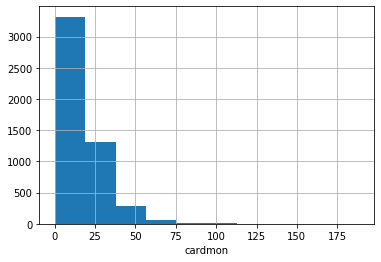

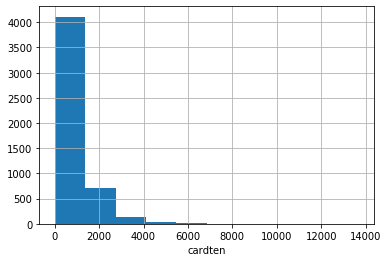

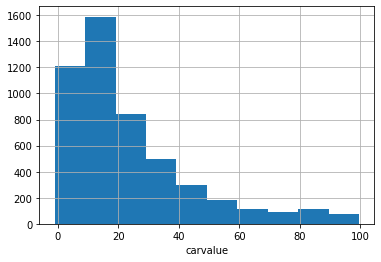

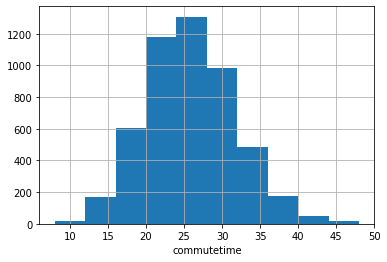

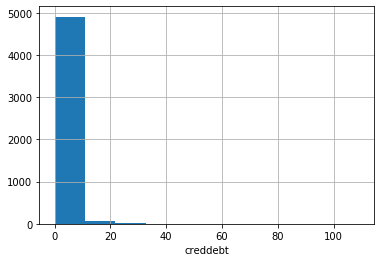

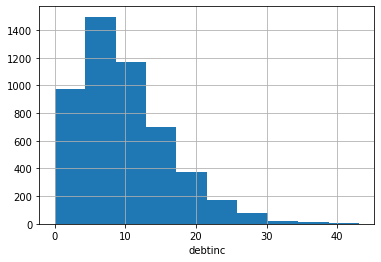

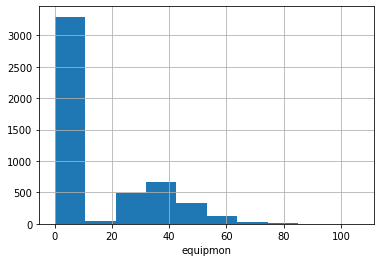

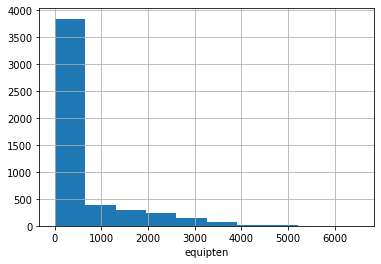

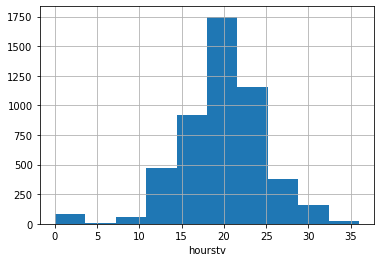

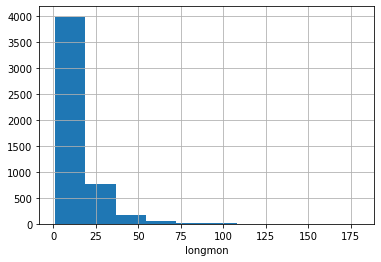

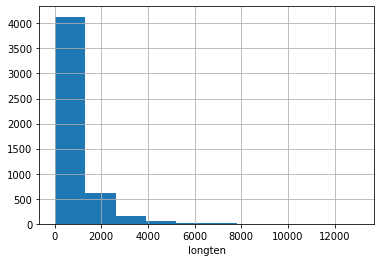

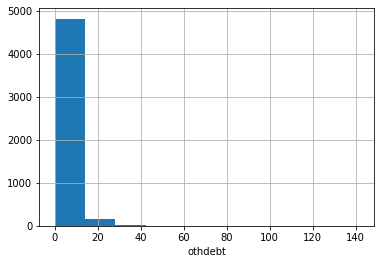

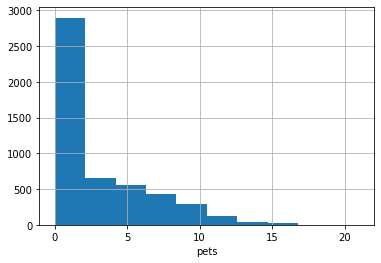

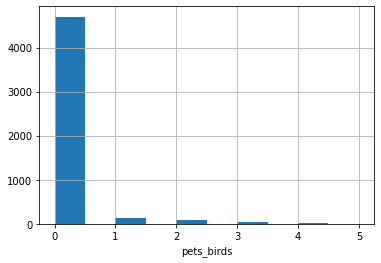

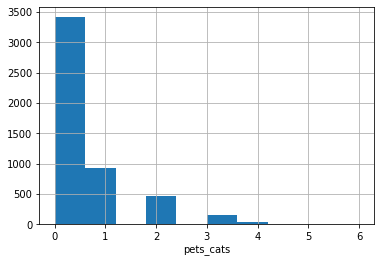

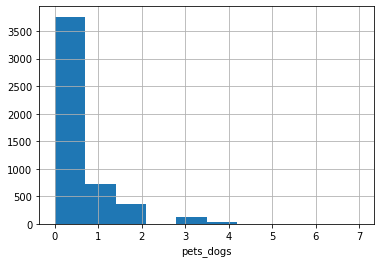

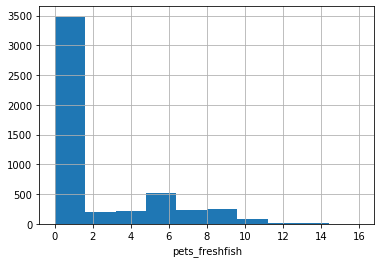

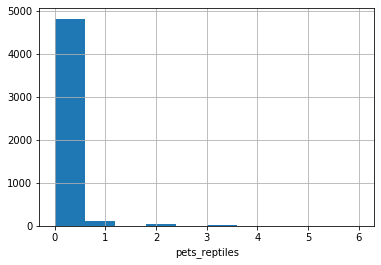

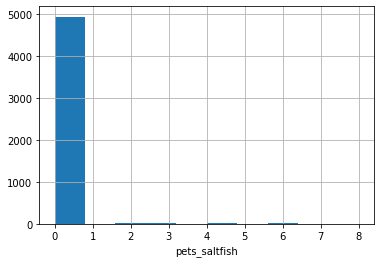

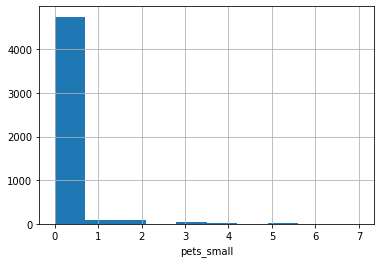

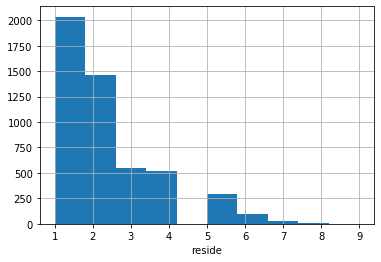

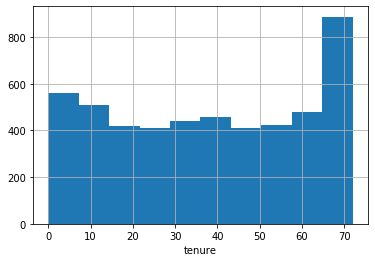

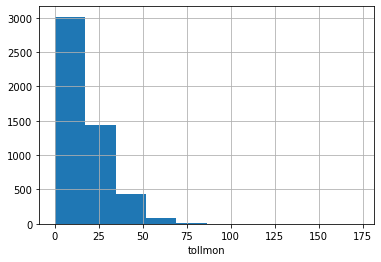

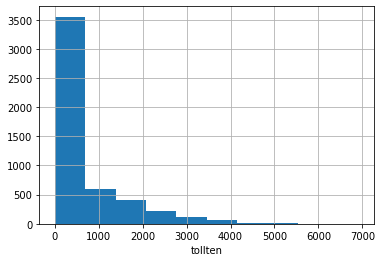

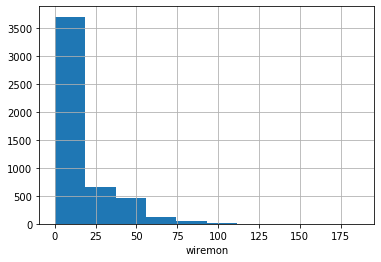

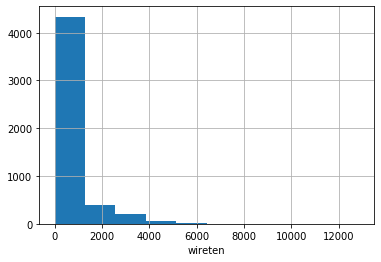

In [23]:
for i in data_int.columns:
    data_int[i].hist()
    pylt.xlabel(str(i))
    pylt.show()

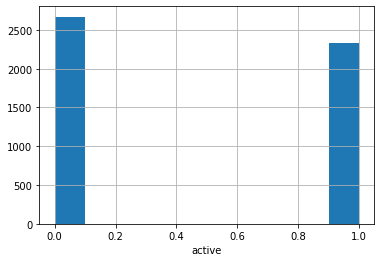

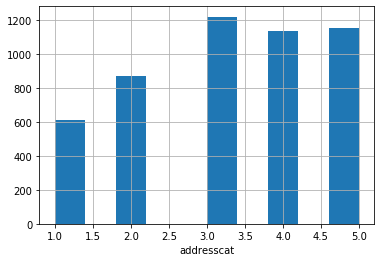

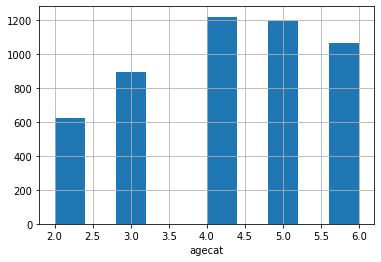

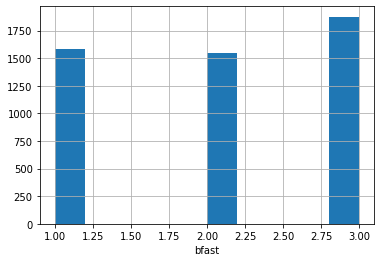

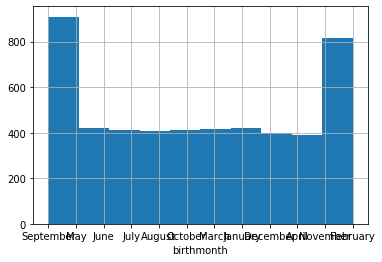

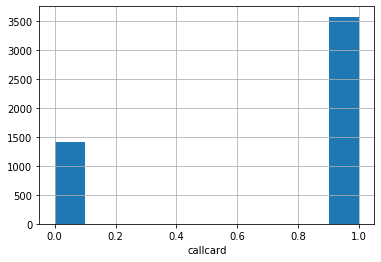

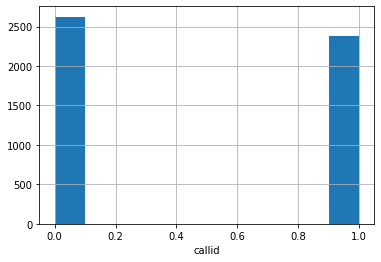

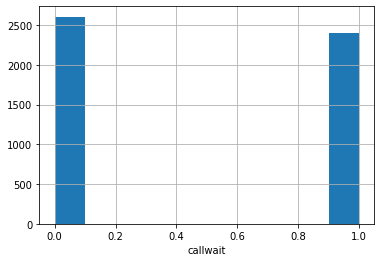

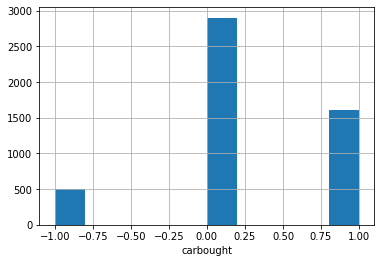

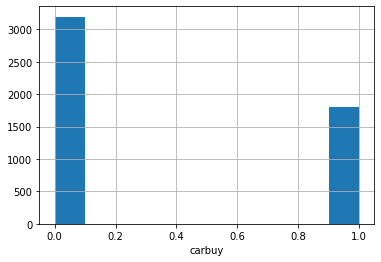

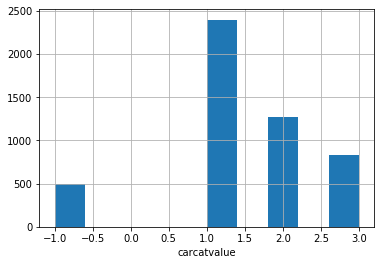

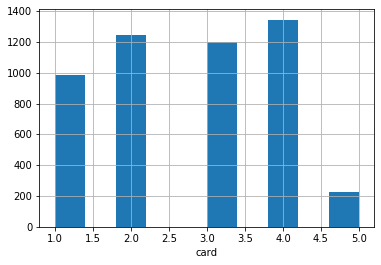

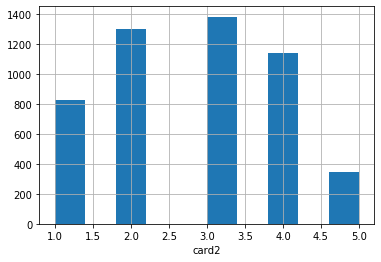

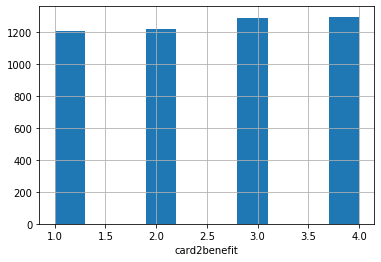

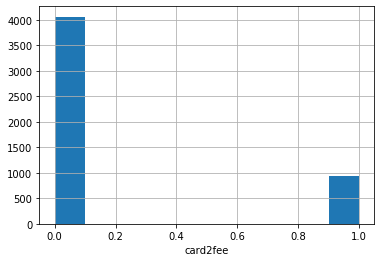

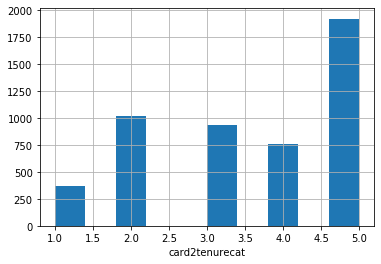

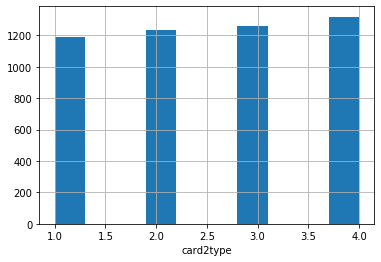

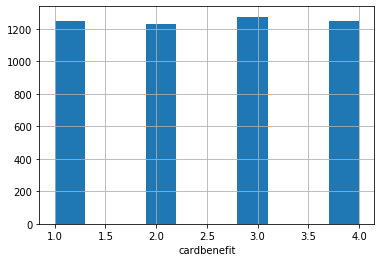

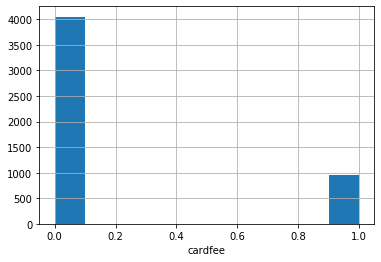

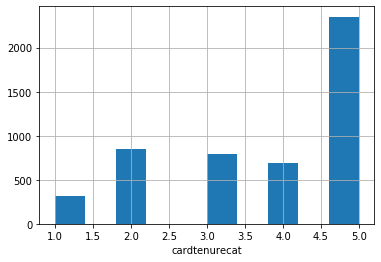

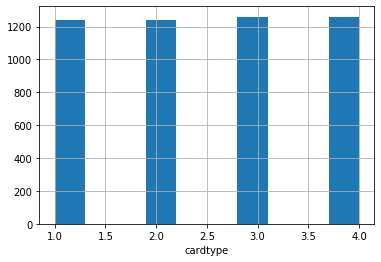

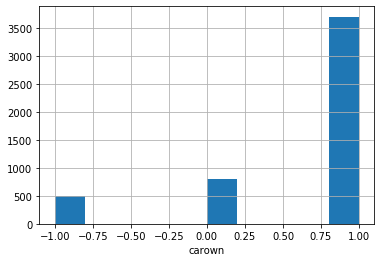

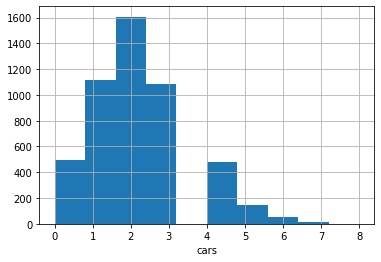

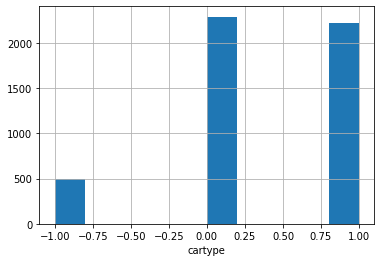

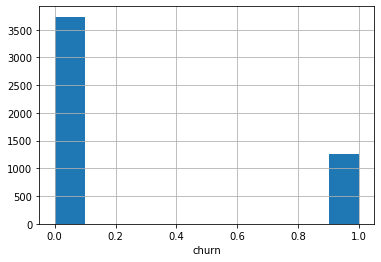

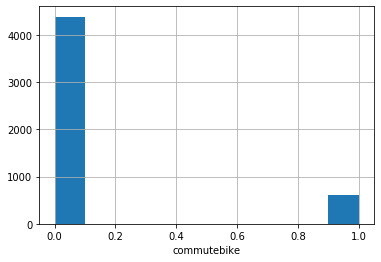

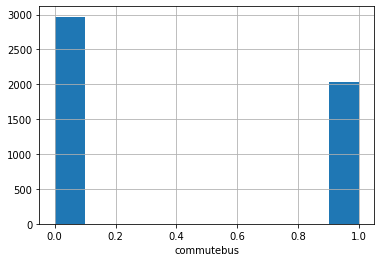

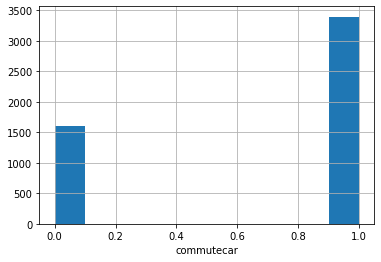

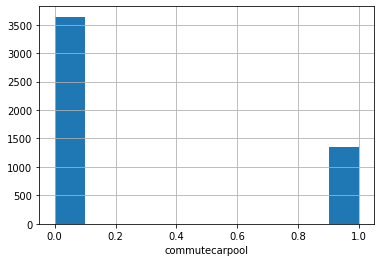

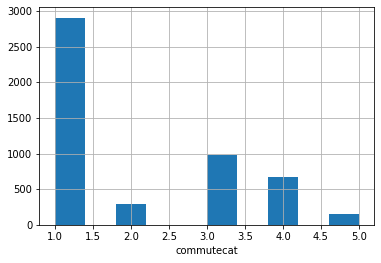

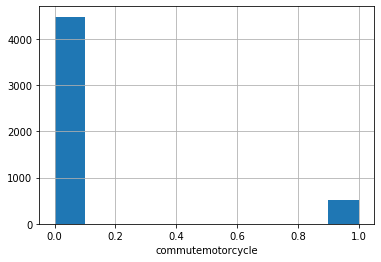

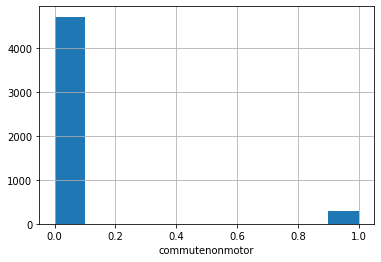

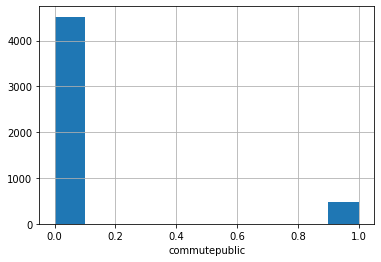

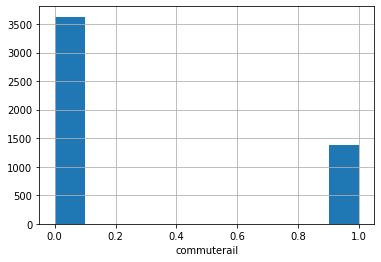

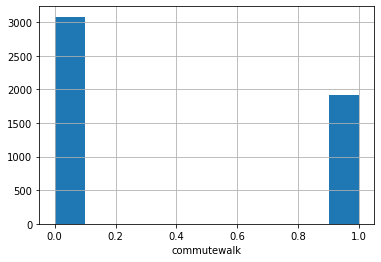

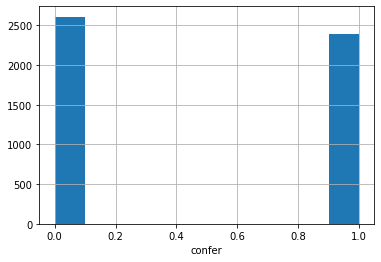

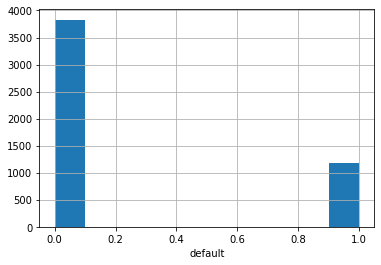

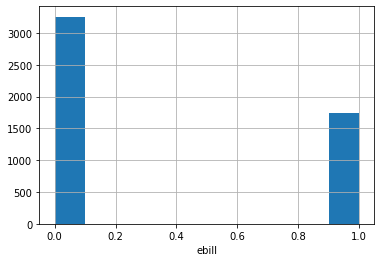

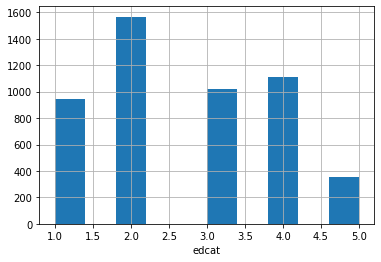

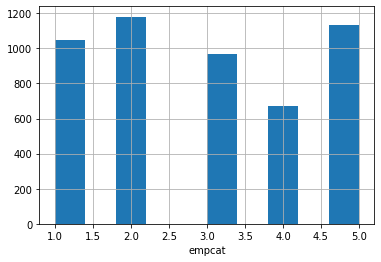

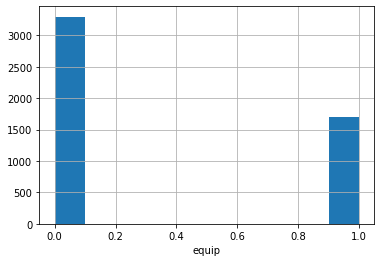

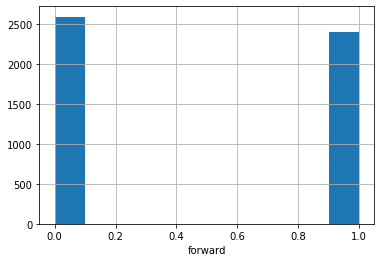

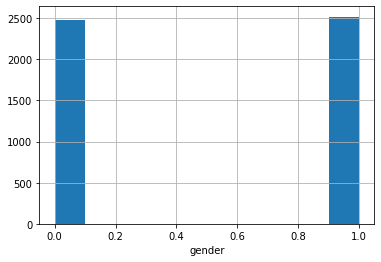

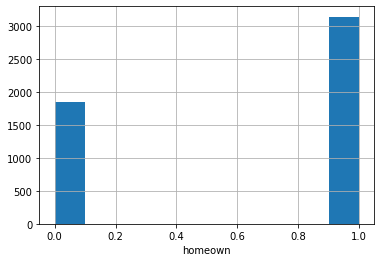

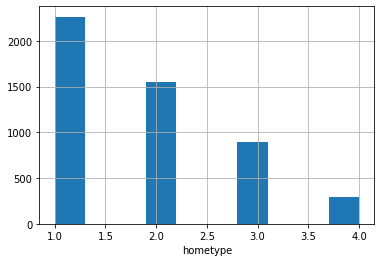

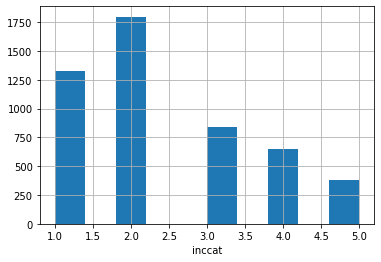

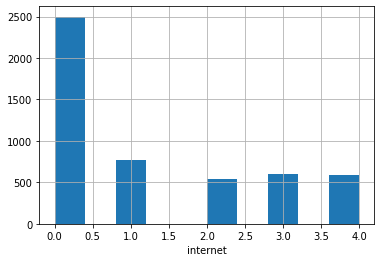

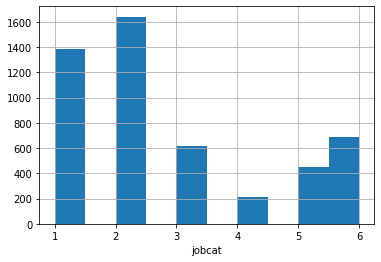

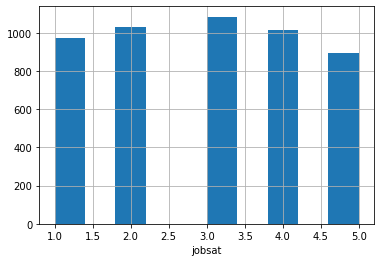

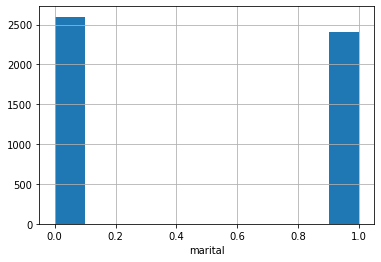

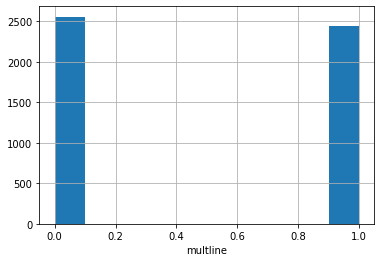

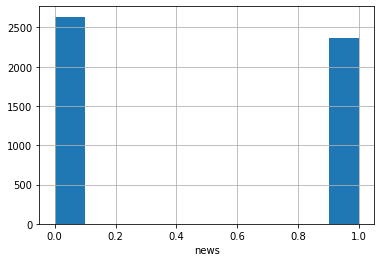

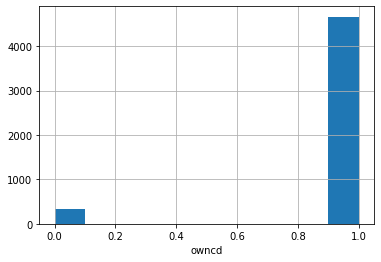

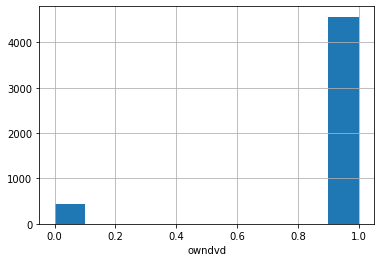

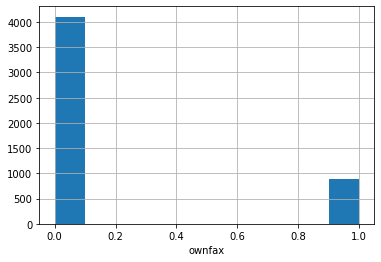

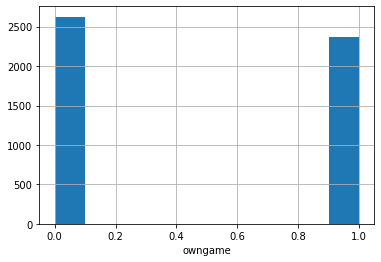

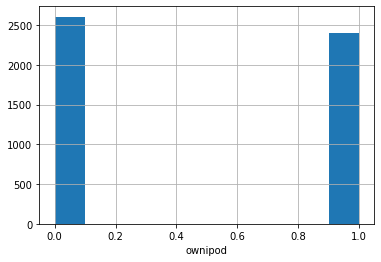

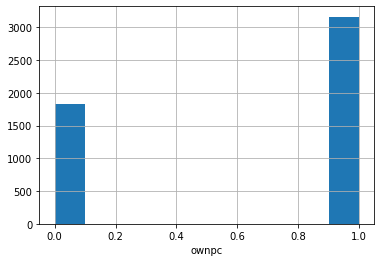

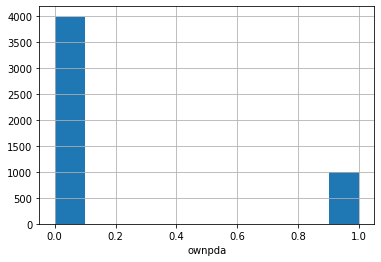

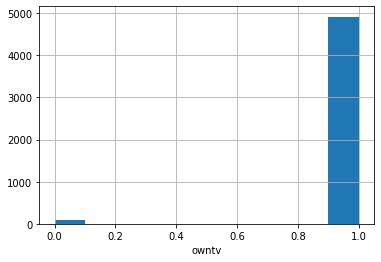

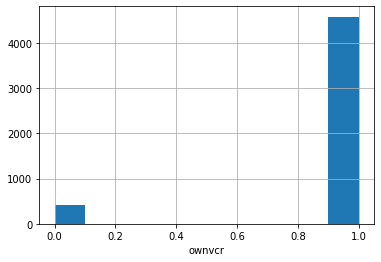

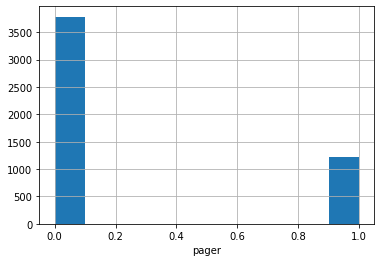

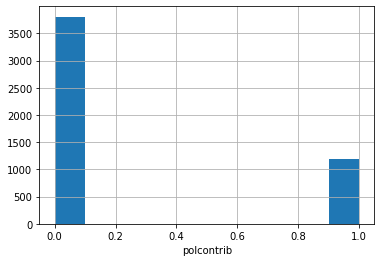

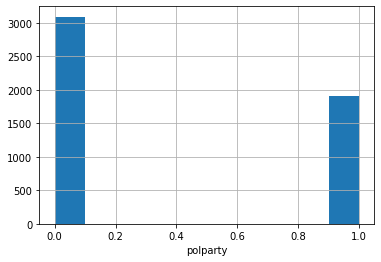

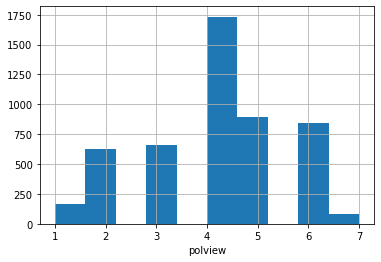

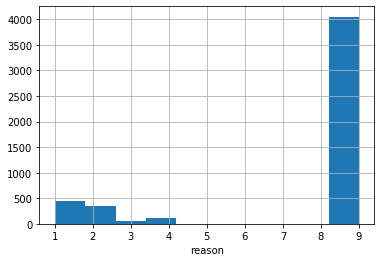

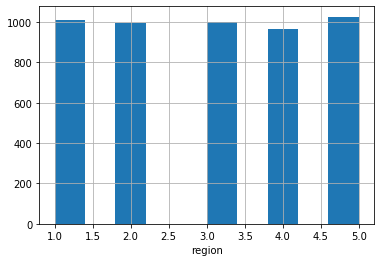

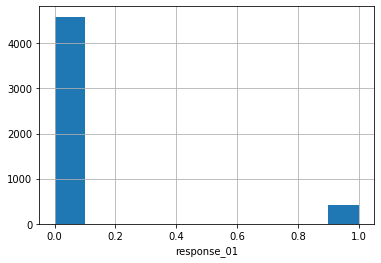

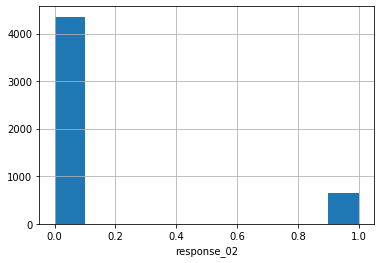

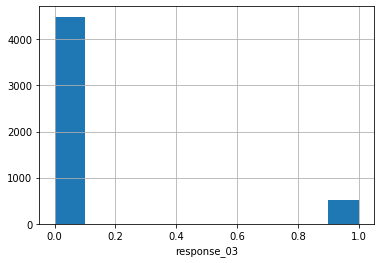

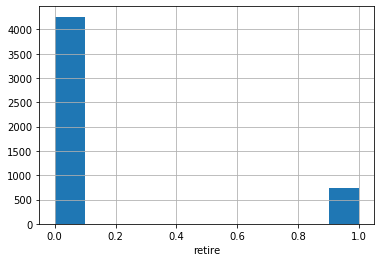

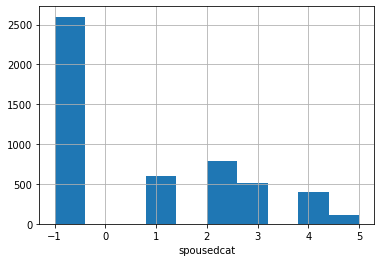

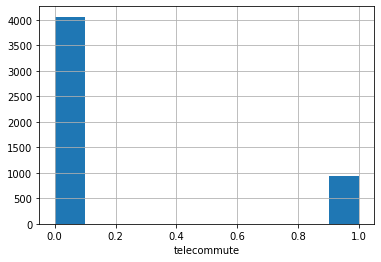

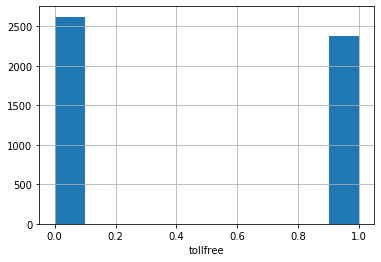

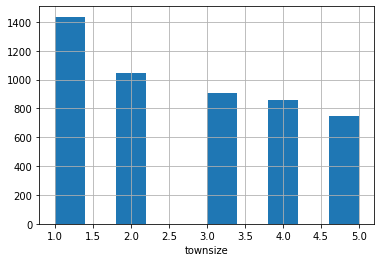

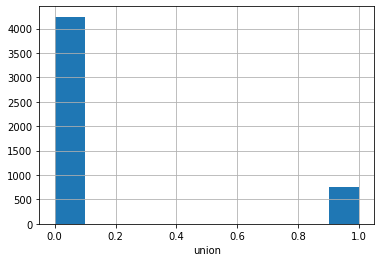

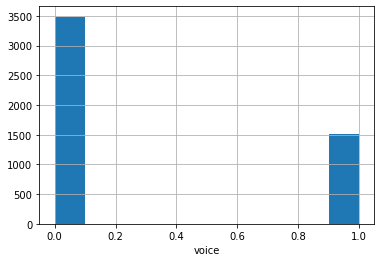

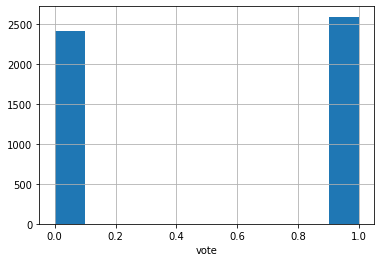

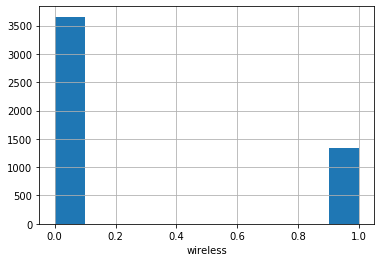

In [24]:
for i in data_obj.columns:
    data_obj[i].hist()
    pylt.xlabel(str(i))
    pylt.show()

In [25]:
for i in data_obj.columns:
    print(str(i),":")
    print(data_obj[i].value_counts(),"\n")
    

active :
0    2670
1    2330
Name: active, dtype: int64 

addresscat :
3    1221
5    1157
4    1139
2     873
1     610
Name: addresscat, dtype: int64 

agecat :
4    1222
5    1195
6    1068
3     893
2     622
Name: agecat, dtype: int64 

bfast :
3    1875
1    1582
2    1543
Name: bfast, dtype: int64 

birthmonth :
September    458
May          451
January      420
June         420
February     418
March        416
July         413
October      410
August       406
November     399
December     398
April        391
Name: birthmonth, dtype: int64 

callcard :
1    3581
0    1419
Name: callcard, dtype: int64 

callid :
0    2624
1    2376
Name: callid, dtype: int64 

callwait :
0    2605
1    2395
Name: callwait, dtype: int64 

carbought :
 0    2901
 1    1602
-1     497
Name: carbought, dtype: int64 

carbuy :
0    3195
1    1805
Name: carbuy, dtype: int64 

carcatvalue :
 1    2399
 2    1267
 3     837
-1     497
Name: carcatvalue, dtype: int64 

card :
4    1344
2    1247
3    1

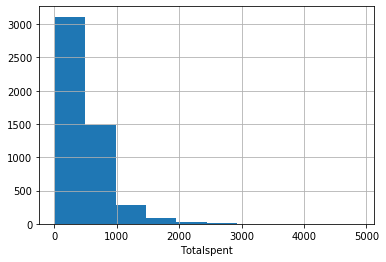

In [26]:
for i in Totalspent.columns:
    Totalspent[i].hist()
    pylt.xlabel(str(i))
    pylt.show()

### 4.4. Treating Outliers

In [27]:
#Outlier treatment
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

#Implementing outlier function 
data_int = data_int.apply(outlier_capping)
Totalspent = Totalspent.apply(outlier_capping)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


### 4.5. Treating Missing Values

In [28]:
def missing_int(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
         x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

def missing_obj(x, stats = 'mode'):
        x = x.fillna(x.mode()[0])
        return x

In [29]:
data_int = data_int.apply(missing_int)
data_obj = data_obj.apply(missing_obj)

In [30]:
data_obj.apply(obj_summary).T

N NMISS       MODE  FREQ PERCENT
active      5000     0          0  2670    53.4
addresscat  5000     0          3  1221   24.42
agecat      5000     0          4  1222   24.44
bfast       5000     0          3  1875    37.5
birthmonth  5000     0  September   458    9.16
...          ...   ...        ...   ...     ...
townsize    5000     0          1  1438   28.76
union       5000     0          0  4244   84.88
voice       5000     0          0  3485    69.7
vote        5000     0          1  2590    51.8
wireless    5000     0          0  3656   73.12

[79 rows x 5 columns]

In [31]:
data_int.apply(int_summary).T.round(2)

N  NMISS         SUM    MEAN  MEDIAN     STD        VAR  \
cardmon         5000.0    0.0    76334.75   15.27   13.75   14.16     200.40   
cardten         5000.0    0.0  3536195.48  707.24  425.00  848.17  719392.66   
carvalue        5000.0    0.0   116011.15   23.20   17.00   21.13     446.47   
commutetime     5000.0    0.0   126661.16   25.33   25.00    5.75      33.12   
creddebt        5000.0    0.0     8791.84    1.76    0.93    2.38       5.67   
debtinc         5000.0    0.0    49570.60    9.91    8.80    6.24      38.96   
equipmon        5000.0    0.0    64543.58   12.91    0.00   18.96     359.33   
equipten        5000.0    0.0  2316991.98  463.40    0.00  882.83  779393.76   
hourstv         5000.0    0.0    98133.00   19.63   20.00    5.12      26.21   
longmon         5000.0    0.0    66363.20   13.27    9.55   11.55     133.44   
longten         5000.0    0.0  3471611.87  694.32  350.20  892.69  796895.18   
othdebt         5000.0    0.0    17612.53    3.52    2.10    4.22      17.82   
pets            5000.0    0.0    15246.00    3.05    2.00    3.35      11.23   
pets_birds      5000.0    0.0      530.00    0.11    0.00    0.46       0.21   
pets_cats       5000.0    0.0     2452.00    0.49    0.00    0.82       0.68   
pets_dogs       5000.0    0.0     1914.00    0.38    0.00    0.75       0.57   
pets_freshfish  5000.0    0.0     9174.00    1.83    0.00    3.03       9.19   
pets_reptiles   5000.0    0.0      250.00    0.05    0.00    0.27       0.07   
pets_saltfish   5000.0    0.0      113.00    0.02    0.00    0.21       0.04   
pets_small      5000.0    0.0      514.00    0.10    0.00    0.48       0.23   
reside          5000.0    0.0    10971.00    2.19    2.00    1.36       1.85   
tenure          5000.0    0.0   191027.00   38.21   38.00   22.66     513.52   
tollmon         5000.0    0.0    65700.38   13.14    0.00   15.81     250.00   
tollten         5000.0    0.0  2850650.97  570.13    0.00  914.74  836756.66   
wiremon         5000.0    0.0    52651.35   10.53    0.00   19.02     361.81   
wireten         5000.0    0.0  2049800.10  409.96    0.00  930.01  864913.76   

                  MIN     P1     P5     P25     P50      P75      P95  \
cardmon          0.00   0.00   0.00    0.00   13.75    22.75    42.00   
cardten          0.00   0.00   0.00    0.00  425.00  1080.00  2455.25   
carvalue        -1.00  -1.00  -1.00    9.20   17.00    31.10    72.00   
commutetime     13.00  13.00  16.00   21.00   25.00    29.00    35.00   
creddebt         0.03   0.03   0.10    0.39    0.93     2.06     6.37   
debtinc          0.70   0.70   1.90    5.10    8.80    13.60    22.20   
equipmon         0.00   0.00   0.00    0.00    0.00    30.80    49.05   
equipten         0.00   0.00   0.00    0.00    0.00   510.16  2600.99   
hourstv          0.00   0.00  12.00   17.00   20.00    23.00    28.00   
longmon          1.85   1.85   2.90    5.70    9.55    16.55    36.76   
longten          2.40   2.40  12.64  104.64  350.20   913.51  2565.93   
othdebt          0.11   0.11   0.29    0.98    2.10     4.31    11.82   
pets             0.00   0.00   0.00    0.00    2.00     5.00    10.00   
pets_birds       0.00   0.00   0.00    0.00    0.00     0.00     1.00   
pets_cats        0.00   0.00   0.00    0.00    0.00     1.00     2.00   
pets_dogs        0.00   0.00   0.00    0.00    0.00     0.00     2.00   
pets_freshfish   0.00   0.00   0.00    0.00    0.00     4.00     8.00   
pets_reptiles    0.00   0.00   0.00    0.00    0.00     0.00     0.00   
pets_saltfish    0.00   0.00   0.00    0.00    0.00     0.00     0.00   
pets_small       0.00   0.00   0.00    0.00    0.00     0.00     1.00   
reside           1.00   1.00   1.00    1.00    2.00     3.00     5.00   
tenure           1.00   1.00   4.00   18.00   38.00    59.00    72.00   
tollmon          0.00   0.00   0.00    0.00    0.00    24.50    43.50   
tollten          0.00   0.00   0.00    0.00    0.00   885.45  2620.21   
wiremon          0.00   0.00   0.00

In [32]:
Totalspent.apply(int_summary).T.round(2)

N  NMISS         SUM    MEAN  MEDIAN    STD        VAR   MIN  \
Totalspent  5000.0    0.0  2467176.43  493.44  414.25  322.8  104196.82  58.2   

              P1      P5     P25     P50     P75      P95      P99     MAX  
Totalspent  58.2  133.11  276.28  414.25  615.56  1145.15  1760.01  1760.1

### 4.5. Creating Dummy

In [33]:
#Creating dummies for nominal categorical variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [34]:
for c_feature in [object_col]:
    data_obj[c_feature] = data_obj[c_feature].astype('category')
    data_obj_dumy = create_dummies(data_obj , c_feature )

In [35]:
data_obj_dumy

active_1  addresscat_2  addresscat_3  addresscat_4  addresscat_5  \
0            0             0             0             0             0   
1            1             0             0             0             0   
2            0             0             0             0             1   
3            1             1             0             0             0   
4            1             1             0             0             0   
...        ...           ...           ...           ...           ...   
4995         0             0             0             1             0   
4996         1             0             1             0             0   
4997         0             0             0             0             1   
4998         0             0             0             1             0   
4999         1             0             1             0             0   

      agecat_3  agecat_4  agecat_5  agecat_6  bfast_2  ...  telecommute_1  \
0            0         0         0         0        0  ...              0   
1            0         0         0         0        0  ...              1   
2            0         0         0         1        0  ...              0   
3            0         0         0         0        0  ...              0   
4            1         0         0         0        0  ...              0   
...        ...       ...       ...       ...      ...  ...            ...   
4995         0         0         0         1        1  ...              0   
4996         0         0         1         0        0  ...              0   
4997         0         0         0         1        0  ...              0   
4998         0         1         0         0        0  ...              0   
4999         0         1         0         0        0  ...              0   

      tollfree_1  townsize_2.0  townsize_3.0  townsize_4.0  townsize_5.0  \
0              1             1             0             0             0   
1              0             0             0             0             1   
2              0             0             0             1             0   
3              0             0             1             0             0   
4              1             1             0             0             0   
...          ...           ...           ...           ...           ...   
4995           0             1             0             0             0   
4996           1             0             1             0             0   
4997           1             0             0             0             1   
4998           0             0             0             0             0   
4999           0             0             0             0             1   

      union_1  voice_1  vote_1  wireless_1  
0           1        1       1           0  
1           0        1       0           1  
2           0        0       0           0  
3           0        0       0           0  
4           0        1       0           1  
...       ...      ...     ...         ...  
4995        0        0       1           0  
4996        0        0       0           1  
4997        0        0       0           0  
4998        0        0       0           0  
4999        0        0       1           0  

[5000 rows x 170 columns]

In [36]:
data_obj_dumy.shape

(5000, 170)

### 4.7 Final Data

In [37]:
data_final = pd.concat([data_int, data_obj_dumy,Totalspent],axis=1)

In [38]:
data_final.head()

cardmon  cardten  carvalue  commutetime  creddebt  debtinc  equipmon  \
0    14.25     60.0      14.3         22.0  1.200909     11.1     29.50   
1    16.00    610.0       6.8         29.0  1.222020     18.6     54.85   
2    23.00   1410.0      18.8         24.0  0.928620      9.9      0.00   
3    21.00    685.0       8.7         38.0  0.033160      5.7      0.00   
4    17.25    360.0      10.6         32.0  0.214659      1.7      0.00   

   equipten  hourstv  longmon  ...  tollfree_1  townsize_2.0  townsize_3.0  \
0     126.1       13     6.50  ...           1             1             0   
1    1975.0       18     8.90  ...           0             0             0   
2       0.0       21    28.40  ...           0             0             0   
3       0.0       26     6.00  ...           0             0             1   
4       0.0       27     3.05  ...           1             1             0   

   townsize_4.0  townsize_5.0  union_1  voice_1  vote_1  wireless_1  \
0             0             0        1        1       1           0   
1             0             1        0        1       0           1   
2             1             0        0        0       0           0   
3             0             0        0        0       0           0   
4             0             0        0        1       0           1   

   Totalspent  
0      149.46  
1       77.54  
2      359.97  
3      359.41  
4      507.83  

[5 rows x 197 columns]

In [39]:
data_final.shape

(5000, 197)

# 5.Linear Regression

### 5.1. Normality check

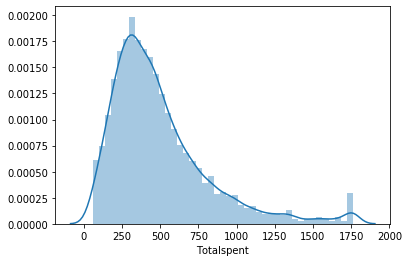

In [40]:
sns.distplot(data_final.Totalspent)

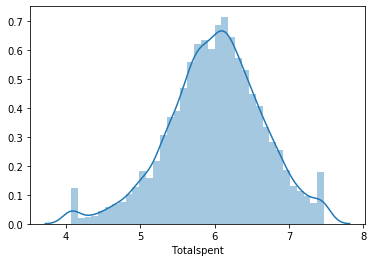

In [41]:
sns.distplot(np.log(data_final.Totalspent))

In [42]:
data_final['lnTotalspent'] = np.log(Totalspent)

In [43]:
data_final.head()

cardmon  cardten  carvalue  commutetime  creddebt  debtinc  equipmon  \
0    14.25     60.0      14.3         22.0  1.200909     11.1     29.50   
1    16.00    610.0       6.8         29.0  1.222020     18.6     54.85   
2    23.00   1410.0      18.8         24.0  0.928620      9.9      0.00   
3    21.00    685.0       8.7         38.0  0.033160      5.7      0.00   
4    17.25    360.0      10.6         32.0  0.214659      1.7      0.00   

   equipten  hourstv  longmon  ...  townsize_2.0  townsize_3.0  townsize_4.0  \
0     126.1       13     6.50  ...             1             0             0   
1    1975.0       18     8.90  ...             0             0             0   
2       0.0       21    28.40  ...             0             0             1   
3       0.0       26     6.00  ...             0             1             0   
4       0.0       27     3.05  ...             1             0             0   

   townsize_5.0  union_1  voice_1  vote_1  wireless_1  Totalspent  \
0             0        1        1       1           0      149.46   
1             1        0        1       0           1       77.54   
2             0        0        0       0           0      359.97   
3             0        0        0       0           0      359.41   
4             0        0        1       0           1      507.83   

   lnTotalspent  
0      5.007029  
1      4.350794  
2      5.886021  
3      5.884464  
4      6.230147  

[5 rows x 198 columns]

### 5.2. Correlation Matrix

In [44]:
# Linearity: correlation matrix (ranges from 1 to -1)
corrm = data_final.corr()
corrm.to_csv('data_final.csv')
corrm

cardmon   cardten  carvalue  commutetime  creddebt   debtinc  \
cardmon       1.000000  0.848393  0.142548    -0.020802  0.103600  0.012167   
cardten       0.848393  1.000000  0.165554    -0.016698  0.121262  0.015897   
carvalue      0.142548  0.165554  1.000000    -0.017653  0.520346  0.014134   
commutetime  -0.020802 -0.016698 -0.017653     1.000000 -0.013469  0.000729   
creddebt      0.103600  0.121262  0.520346    -0.013469  1.000000  0.462598   
...                ...       ...       ...          ...       ...       ...   
voice_1       0.154776  0.032033  0.095898    -0.019175  0.074342 -0.000223   
vote_1        0.000229  0.002301  0.113863     0.000257  0.097559 -0.008310   
wireless_1    0.162061  0.030808  0.128998     0.001902  0.085913 -0.002080   
Totalspent    0.032661  0.048372  0.319367    -0.002720  0.248547  0.015066   
lnTotalspent  0.016715  0.028457  0.306784     0.005384  0.233370  0.016104   

              equipmon  equipten   hourstv   longmon  ...  townsize_2.0  \
cardmon       0.047355  0.149692  0.013073  0.417086  ...     -0.016056   
cardten      -0.010808  0.205690  0.010628  0.643729  ...     -0.012476   
carvalue      0.089404  0.128252  0.046705  0.160197  ...     -0.000482   
commutetime  -0.004929 -0.010427  0.004958 -0.001004  ...     -0.092234   
creddebt      0.060931  0.103360  0.032770  0.124080  ...      0.015623   
...                ...       ...       ...       ...  ...           ...   
voice_1       0.485653  0.368404 -0.007337 -0.048636  ...      0.021872   
vote_1        0.042539  0.034803 -0.004605  0.006991  ...     -0.002816   
wireless_1    0.520600  0.397488  0.002278 -0.045230  ...      0.011413   
Totalspent    0.071432  0.088136  0.031057  0.055582  ...      0.013887   
lnTotalspent  0.070677  0.081837  0.044616  0.036063  ...      0.009117   

              townsize_3.0  townsize_4.0  townsize_5.0   union_1   voice_1  \
cardmon          -0.004487      0.008332     -0.014471  0.012993  0.154776   
cardten          -0.005130     -0.001476     -0.009163  0.012859  0.032033   
carvalue         -0.001260     -0.007822      0.009386  0.004754  0.095898   
commutetime       0.044623      0.190877      0.337173 -0.004832 -0.019175   
creddebt         -0.015848     -0.021482     -0.018018  0.000925  0.074342   
...                    ...           ...           ...       ...       ...   
voice_1          -0.016738      0.011928     -0.013712  0.033932  1.000000   
vote_1           -0.000858     -0.032846      0.021859  0.004907  0.025458   
wireless_1        0.009598     -0.001630      0.000505  0.031214  0.639812   
Totalspent       -0.008580     -0.008732     -0.000710  0.011456  0.036082   
lnTotalspent     -0.003625     -0.000112      0.005859  0.021191  0.044980   

                vote_1  wireless_1  Totalspent  lnTotalspent  
cardmon       0.000229    0.162061    0.032661      0.016715  
cardten       0.002301    0.030808    0.048372      0.028457  
carvalue      0.113863    0.128998    0.319367      0.306784  
commutetime   0.000257    0.001902   -0.002720      0.005384  
creddebt      0.097559    0.085913    0.248547      0.233370  
...                ...         ...         ...           ...  
voice_1       0.025458    0.639812    0.036082      0.044980  
vote_1        1.000000    0.035037    0.063742      0.055833  
wireless_1    0.035037    1.000000    0.067660      0.074040  
Totalspent    0.063742    0.067660    1.000000      0.909423  
lnTotalspent  0.055833    0.074040    0.909423      1.000000  

[198 rows x 198 columns]

# 6. Variable Reduction

In [45]:
features = data_final[data_final.columns.difference(['Totalspent','lnTotalspent'])]
target = data_final['lnTotalspent']

### 6.1. RFE  Recursive Feature Elimination

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
lm_RFE = LinearRegression()

# creating the RFE model and select the 50 attributes
model_RFE = RFE(lm_RFE, n_features_to_select=50)
model_RFE = model_RFE.fit(features, target)

In [48]:
# capturing the important variables
RFE_features_columns = features.columns[model_RFE.get_support()]
RFE_features = features[RFE_features_columns]

### 6.2.   f - regression

In [49]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(RFE_features, target )

In [50]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(RFE_features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [51]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])

In [52]:
f_reg_results

Variable     F_Value P_Value
18   cardtenurecat_5   13.728752   0.000
35          inccat_5  261.047066   0.000
34          inccat_4  158.231495   0.000
33          inccat_3   59.180235   0.000
32          inccat_2   18.456887   0.000
31          gender_1   31.073380   0.000
38          owndvd_1  138.282716   0.000
39          ownvcr_1  125.995381   0.000
42          reason_2  113.372065   0.000
44          retire_1  204.476976   0.000
20          carown_1   76.120108   0.000
19          carown_0  131.866254   0.000
14            card_4   26.838527   0.000
37           owncd_1  111.383646   0.000
12            card_2   72.100414   0.000
2      carcatvalue_1  436.617805   0.000
3      carcatvalue_2   41.388424   0.000
4      carcatvalue_3  362.711396   0.000
5            card2_2   28.810884   0.000
6            card2_3   37.936644   0.000
7            card2_4   17.147553   0.000
13            card_3   61.980090   0.000
8            card2_5   13.881409   0.000
15            card_5   10.529628   0.001
21            cars_1    7.655949   0.006
11  card2tenurecat_5    7.110148   0.008
45      spousedcat_1    5.789175   0.016
10  card2tenurecat_4    4.944470   0.026
16   cardtenurecat_3    4.928417   0.026
48      spousedcat_4    4.733582   0.030
17   cardtenurecat_4    4.026462   0.045
47      spousedcat_3    3.238676   0.072
29         cartype_0    3.101425   0.078
49      spousedcat_5    1.909397   0.167
36         marital_1    1.746038   0.186
43          reason_9    1.739730   0.187
30         cartype_1    1.088060   0.297
41         polview_7    0.995557   0.318
0        carbought_0    0.923600   0.337
24            cars_4    0.921730   0.337
27            cars_7    0.682729   0.409
22            cars_2    0.589353   0.443
25            cars_5    0.341207   0.559
26            cars_6    0.316750   0.574
28            cars_8    0.106545   0.744
46      spousedcat_2    0.104398   0.747
9   card2tenurecat_3    0.077070   0.781
40     pets_saltfish    0.063503   0.801
1        carbought_1    0.061058   0.805
23            cars_3    0.030233   0.862

### 6.3. If p - values are less, then variables are siginificant in the regression equation.

In [53]:
f_reg_results_new = f_reg_results[f_reg_results['P_Value'] <= '0.1']
f_reg_results_new

Variable     F_Value P_Value
18   cardtenurecat_5   13.728752   0.000
35          inccat_5  261.047066   0.000
34          inccat_4  158.231495   0.000
33          inccat_3   59.180235   0.000
32          inccat_2   18.456887   0.000
31          gender_1   31.073380   0.000
38          owndvd_1  138.282716   0.000
39          ownvcr_1  125.995381   0.000
42          reason_2  113.372065   0.000
44          retire_1  204.476976   0.000
20          carown_1   76.120108   0.000
19          carown_0  131.866254   0.000
14            card_4   26.838527   0.000
37           owncd_1  111.383646   0.000
12            card_2   72.100414   0.000
2      carcatvalue_1  436.617805   0.000
3      carcatvalue_2   41.388424   0.000
4      carcatvalue_3  362.711396   0.000
5            card2_2   28.810884   0.000
6            card2_3   37.936644   0.000
7            card2_4   17.147553   0.000
13            card_3   61.980090   0.000
8            card2_5   13.881409   0.000
15            card_5   10.529628   0.001
21            cars_1    7.655949   0.006
11  card2tenurecat_5    7.110148   0.008
45      spousedcat_1    5.789175   0.016
10  card2tenurecat_4    4.944470   0.026
16   cardtenurecat_3    4.928417   0.026
48      spousedcat_4    4.733582   0.030
17   cardtenurecat_4    4.026462   0.045
47      spousedcat_3    3.238676   0.072
29         cartype_0    3.101425   0.078

# 7. Spliting train and test

In [54]:
train, test = train_test_split(data_final, test_size = 0.3 , random_state = 123456)

In [55]:
test.shape

(1500, 198)

In [56]:
train.shape

(3500, 198)

# 8. Modeling linear regression

In [57]:
features_model = 'lnTotalspent ~ '+'+'.join(f_reg_results_new.Variable)

In [58]:
features_model

'lnTotalspent ~ cardtenurecat_5+inccat_5+inccat_4+inccat_3+inccat_2+gender_1+owndvd_1+ownvcr_1+reason_2+retire_1+carown_1+carown_0+card_4+owncd_1+card_2+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card_3+card2_5+card_5+cars_1+card2tenurecat_5+spousedcat_1+card2tenurecat_4+cardtenurecat_3+spousedcat_4+cardtenurecat_4+spousedcat_3+cartype_0'

In [59]:
import statsmodels.formula.api as smf

In [60]:
model_reg = smf.ols(features_model, data = train).fit()

In [74]:
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:           lnTotalspent   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     55.08
Date:                Mon, 13 Jul 2020   Prob (F-statistic):          9.67e-281
Time:                        10:08:03   Log-Likelihood:                -2726.2
No. Observations:                3500   AIC:                             5518.
Df Residuals:                    3467   BIC:                             5722.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5320      0.063  

### 8.1.  VIF (Variance Inflation Factor): Check the multicollinieirity for all the variables in the model

In [75]:
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# separate the Y and X variables
y, X = dmatrices(features_model, train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

C:\Users\Ashu\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [76]:
vif.sort_values(by='VIF Factor', ascending=False)

Features  VIF Factor
17     carcatvalue_2         inf
11          carown_1         inf
18     carcatvalue_3         inf
16     carcatvalue_1         inf
12          carown_0         inf
0          Intercept   49.017130
1    cardtenurecat_5    6.752087
26  card2tenurecat_5    5.575081
3           inccat_4    3.527807
2           inccat_5    3.380285
4           inccat_3    2.937870
21           card2_4    2.266390
28  card2tenurecat_4    2.249820
5           inccat_2    2.218383
13            card_4    2.197761
20           card2_3    2.122502
31   cardtenurecat_4    2.062646
19           card2_2    2.017748
15            card_2    1.926514
22            card_3    1.915166
10          retire_1    1.668371
29   cardtenurecat_3    1.552064
8           ownvcr_1    1.549782
14           owncd_1    1.467380
7           owndvd_1    1.465599
23           card2_5    1.410860
24            card_5    1.259161
33         cartype_0    1.112935
27      spousedcat_1    1.064042
25            cars_1    1.044879
30      spousedcat_4    1.044400
32      spousedcat_3    1.039972
9           reason_2    1.018654
6           gender_1    1.015077

### 8.2. Removing variable based on VIF

In [77]:
features_model2 = '''lnTotalspent ~ inccat_5+inccat_4+inccat_3+inccat_2+gender_1+owndvd_1+
ownvcr_1+reason_2+retire_1+card_4+owncd_1+card_2+card2_2+card2_3+card2_4+card_3+card2_5+card_5+cars_1+
spousedcat_1+card2tenurecat_4+cardtenurecat_3+spousedcat_4+cardtenurecat_4+spousedcat_3+cartype_0'''

### 8.3. Modeling linear regression after removing variable based on VIF

In [78]:
model_reg2 = smf.ols(features_model2,data=train).fit()
print(model_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:           lnTotalspent   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     67.27
Date:                Mon, 13 Jul 2020   Prob (F-statistic):          8.58e-284
Time:                        10:08:11   Log-Likelihood:                -2731.7
No. Observations:                3500   AIC:                             5517.
Df Residuals:                    3473   BIC:                             5684.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.4944      0.056  

In [79]:
# separate the Y and X variables
y, X = dmatrices(features_model2, train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [80]:
vif.sort_values(by = 'VIF Factor', ascending=False)

Features  VIF Factor
0          Intercept   38.656165
15           card2_4    2.263947
10            card_4    2.187016
14           card2_3    2.121559
13           card2_2    2.013100
4           inccat_2    2.007054
12            card_2    1.921327
16            card_3    1.910658
3           inccat_3    1.754124
2           inccat_4    1.659517
7           ownvcr_1    1.521857
1           inccat_5    1.476094
11           owncd_1    1.460155
6           owndvd_1    1.445165
17           card2_5    1.409816
18            card_5    1.257484
9           retire_1    1.252967
24   cardtenurecat_4    1.185493
21  card2tenurecat_4    1.155029
22   cardtenurecat_3    1.083622
20      spousedcat_1    1.053539
23      spousedcat_4    1.039328
25      spousedcat_3    1.036690
8           reason_2    1.016963
5           gender_1    1.012856
19            cars_1    1.012513
26         cartype_0    1.008482

# 9. Model Validation

In [81]:
#Transforming log values into actual values in both training and testing data sets
train['pred'] =np.exp(model_reg2.predict(train))
test['pred'] =np.exp(model_reg2.predict(test))

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
#Checking Metrics for both training and testing data sets

print("MAPE for Training and testing data sets:")
MAPE_train = np.mean(np.abs(train.lnTotalspent - train.pred)/train.lnTotalspent)
print('Training   : ',MAPE_train)
MAPE_train = np.mean(np.abs(test.lnTotalspent - test.pred)/test.lnTotalspent)
print('Testing    : ',MAPE_train)
print("\nMSE for Training and testing data sets:")
#MSE for training and testing data sets                           
print('Training   : ',metrics.mean_squared_error(train.lnTotalspent,train.pred)) 
print('Testing    : ',metrics.mean_squared_error(test.lnTotalspent,test.pred))
print("\nRMSE for Training and testing data sets:")
#RMSE for training and testing data sets                           
print('Training   : ',np.sqrt(metrics.mean_squared_error(train.lnTotalspent,train.pred)))
print('Testing    : ',np.sqrt(metrics.mean_squared_error(test.lnTotalspent,test.pred)))
#Accuracy metrics (c. Correlation)
Corr_train = stats.stats.pearsonr(train.lnTotalspent, train.pred)
Corr_test = stats.stats.pearsonr(train.lnTotalspent, train.pred)
print('\nCorrelation for Training and testing data set:')
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE for Training and testing data sets:
Training   :  71.1126908057837
Testing    :  70.39608954756146

MSE for Training and testing data sets:
Training   :  218940.45800263408
Testing    :  213872.31779616658

RMSE for Training and testing data sets:
Training   :  467.91073721665555
Testing    :  462.4633150814955

Correlation for Training and testing data set:
Training   :  (0.5605196736273823, 8.1307512811210725e-289)
Testing    :  (0.5605196736273823, 8.1307512811210725e-289)


C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


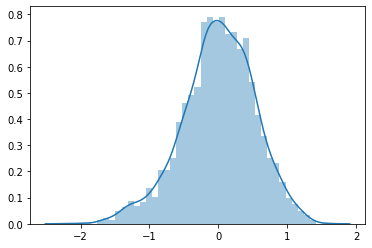

In [83]:
#Checking Errors distribution
#model_reg2.resid.hist(bins=15)
sns.distplot(model_reg2.resid)
model_reg2.resid.to_csv("Residual.csv")
# Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

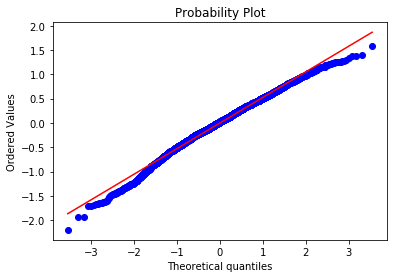

In [84]:
from scipy import stats
import pylab

stats.probplot(model_reg2.resid, dist = 'norm', plot = pylab)
pylab.show()


In [85]:
# assumption: mean of residuals/errors is zero
print(model_reg2.resid.mean())

-2.55440113505756e-15


In [86]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable
print(stats.stats.pearsonr(model_reg2.resid, train.lnTotalspent))

(0.8155201130208795, 0.0)


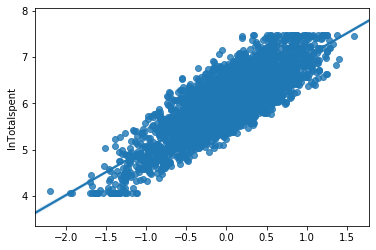

In [87]:
sns.regplot(x=model_reg2.resid, y= train.lnTotalspent)

### 9.1. Decile Analysis

In [88]:
#Decile analysis for validation of models - Business validation

train['Deciles']=pd.qcut(train['pred'],10, labels=False)
test['Deciles']=pd.qcut(test['pred'],10, labels=False)

C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [89]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = train[['Deciles','lnTotalspent']].groupby(train.Deciles).mean().sort_index(ascending=False)['lnTotalspent']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

pred  lnTotalspent
Deciles                          
9        830.078951      6.695268
8        623.508965      6.435780
7        530.275823      6.256837
6        466.138200      6.162865
5        415.406647      6.007032
4        374.502223      5.942723
3        337.775200      5.873845
2        306.768005      5.721791
1        277.396446      5.606775
0        228.922507      5.414625

In [90]:
# Decile Analysis for Test data
Predicted_avg = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = test[['Deciles','lnTotalspent']].groupby(test.Deciles).mean().sort_index(ascending=False)['lnTotalspent']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test

pred  lnTotalspent
Deciles                          
9        832.376202      6.694372
8        615.455575      6.369882
7        519.588370      6.213706
6        456.006967      6.168963
5        405.330481      5.978439
4        365.407806      5.826618
3        331.535412      5.818003
2        301.440457      5.705999
1        273.078176      5.658235
0        228.039708      5.454113

### 9.2 Predict Totalspent

In [91]:
data_final['Predited'] = np.exp(model_reg2.predict(data_final))
data_final['lnPredited'] = model_reg2.predict(data_final)

In [92]:
data_final.head()

cardmon  cardten  carvalue  commutetime  creddebt  debtinc  equipmon  \
0    14.25     60.0      14.3         22.0  1.200909     11.1     29.50   
1    16.00    610.0       6.8         29.0  1.222020     18.6     54.85   
2    23.00   1410.0      18.8         24.0  0.928620      9.9      0.00   
3    21.00    685.0       8.7         38.0  0.033160      5.7      0.00   
4    17.25    360.0      10.6         32.0  0.214659      1.7      0.00   

   equipten  hourstv  longmon  ...  townsize_4.0  townsize_5.0  union_1  \
0     126.1       13     6.50  ...             0             0        1   
1    1975.0       18     8.90  ...             0             1        0   
2       0.0       21    28.40  ...             1             0        0   
3       0.0       26     6.00  ...             0             0        0   
4       0.0       27     3.05  ...             0             0        0   

   voice_1  vote_1  wireless_1  Totalspent  lnTotalspent    Predited  \
0        1       1           0      149.46      5.007029  333.068776   
1        1       0           1       77.54      4.350794  285.793222   
2        0       0           0      359.97      5.886021  413.714419   
3        0       0           0      359.41      5.884464  310.657128   
4        1       0           1      507.83      6.230147  365.211506   

   lnPredited  
0    5.808349  
1    5.655269  
2    6.025176  
3    5.738690  
4    5.900477  

[5 rows x 200 columns]

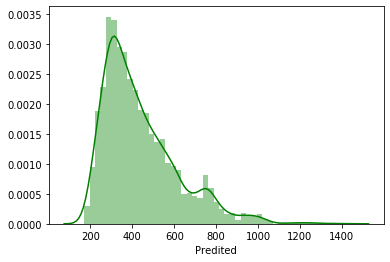

In [99]:
# Predicted normality check
sns.distplot(data_final.Predited,color = 'g')

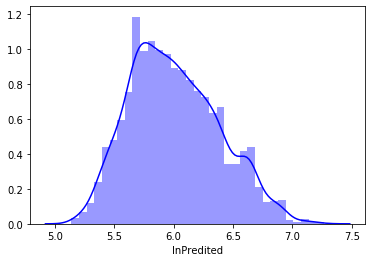

In [100]:
sns.distplot(data_final.lnPredited,color = 'b')

# 10. Machine Learning

### 10.1. Train - test split 

In [101]:
Ind_col = data_final.columns.difference(['Totalspent','lnTotalspent','Predited','lnPredited'])

In [102]:
train_x, test_x, train_y, test_y = train_test_split(data_final[Ind_col], data_final.lnTotalspent, test_size=0.3, random_state=12345)

# 10.2. Ridge

In [103]:
# Importing Required Packages
from sklearn.linear_model import Ridge,Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [101]:
Tuning_ridge = [{'alpha':[0.0001,0.001,0.01,0.1,1.,10.,100.]}]

model_ridge = GridSearchCV(linear_model.Ridge(),
                           Tuning_ridge,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=10
                          )

model_ridge.fit(train_x,train_y)
print('Best combination : ', model_ridge.best_params_)
print('best score   :', model_ridge.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0984s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  35 | elapsed:    0.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  12 out of  35 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.3s remaining:    0.3s


Best combination :  {'alpha': 10.0}
best score   : -0.29455056645315264


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.5s finished


In [104]:
# fitting model with best parametrs

model_ridge = linear_model.Ridge(alpha=10.0)
model_ridge = model_ridge.fit(train_x,train_y)

In [105]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_ridge.predict(train_x))/train_y)
print('Train :',MAPE_train)
MAPE_test = np.mean(np.abs(test_y - model_ridge.predict(test_x))/test_y)
print('Test  :',MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_y,model_ridge.predict(train_x)))
print('Train :',RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_ridge.predict(test_x)))
print('Test  :',RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_ridge.predict(train_x))) 
print('Testing    : ',mean_squared_error(test_y,model_ridge.predict(test_x)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_ridge.predict(train_x))
Corr_test = stats.stats.pearsonr(test_y, model_ridge.predict(test_x))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
Train : 0.06995018366285832
Test  : 0.07493349201336588

RMSE values for training and testing data :
Train : 0.5124003319834951
Test  : 0.5442816600895418

MSE for Training and testing data sets:
Training   :  0.26255410021679604
Testing    :  0.2962425255098275

Correlation for Training and testing data set:
Training   :  (0.608753794181005, 0.0)
Testing    :  (0.5343325267739137, 1.690945985333637e-111)


# 10.3. Lasso Regression

In [100]:
Tuning_Lasso = [{'alpha':[0.0001,0.001,0.01,0.1,1.,10.,100.]}]

model_Lasso = GridSearchCV(linear_model.Lasso(),
                          Tuning_Lasso,
                          n_jobs=-1,
                          cv=5,
                          verbose=10,
                          scoring='neg_mean_squared_error')

model_Lasso.fit(train_x,train_y)
print("best combination :", model_Lasso.best_params_)
print('best score   :', model_Lasso.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    3.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    3.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.5s finished


best combination : {'alpha': 0.001}
best score   : -0.28930098681036487


In [106]:
# fitting model with best parametrs

model_Lasso = linear_model.Lasso(alpha = 0.001, normalize=True)
model_Lasso = model_Lasso.fit(train_x,train_y)

In [107]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_Lasso.predict(train_x))/train_y)
print('Train :',MAPE_train)
MAPE_test = np.mean(np.abs(test_y - model_Lasso.predict(test_x))/test_y)
print('Test  :',MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_Lasso.predict(train_x)))
print('Train :',RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_Lasso.predict(test_x)))
print('Test  :',RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_Lasso.predict(train_x))) 
print('Testing    : ',mean_squared_error(test_y,model_Lasso.predict(test_x)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_Lasso.predict(train_x))
Corr_test = stats.stats.pearsonr(test_y, model_Lasso.predict(test_x))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
Train : 0.08035094538434376
Test  : 0.08159148757024215

RMSE values for training and testing data :
Train : 0.5984659770232987
Test  : 0.5989946727605984

MSE for Training and testing data sets:
Training   :  0.3581615256544515
Testing    :  0.3587946179955763

Correlation for Training and testing data set:
Training   :  (0.4054131074122517, 1.359196430485279e-138)
Testing    :  (0.39389730361939745, 7.466803333157857e-57)


# 10.4. Decision Tree

In [108]:
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [99]:
Tuning_Dtree = {'max_depth':np.arange(2,9),
               'max_features':np.arange(5,12)}

model_Dtree = GridSearchCV(DecisionTreeRegressor(),
                          Tuning_Dtree,
                          cv=5,
                          n_jobs=-1,
                          verbose=10,
                          scoring='neg_mean_squared_error')

model_Dtree = model_Dtree.fit(train_x,train_y)

print('best combination :', model_Dtree.best_params_)
print('best score   :', model_Dtree.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0560s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s


best combination : {'max_depth': 3, 'max_features': 9}
best score   : -0.38253517166043866


[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    1.6s finished


In [109]:
# fitting model with best parametrs

model_Dtree = DecisionTreeRegressor(max_depth=3,max_features=9)
model_Dtree = model_Dtree.fit(train_x,train_y)

In [110]:
# predicting the values
Dtree_train_pred = model_Dtree.predict(train_x)
Dtree_test_pred  = model_Dtree.predict(test_x)

In [111]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - Dtree_train_pred)/train_y)
print('Train :',MAPE_train)
MAPE_test = np.mean(np.abs(test_y - Dtree_test_pred)/test_y)
print('Test  :',MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Dtree_train_pred))
print('Train :',RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Dtree_test_pred))
print('Test  :',RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,Dtree_train_pred)) 
print('Testing    : ',mean_squared_error(test_y,Dtree_test_pred))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, Dtree_train_pred)
Corr_test = stats.stats.pearsonr(test_y, Dtree_test_pred)
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
Train : 0.08268502780749025
Test  : 0.08472281329971369

RMSE values for training and testing data :
Train : 0.6137694897740296
Test  : 0.6193144468134408

MSE for Training and testing data sets:
Training   :  0.37671298657747254
Testing    :  0.3835503840318382

Correlation for Training and testing data set:
Training   :  (0.3096364123338711, 1.2073644232263591e-78)
Testing    :  (0.274822946589641, 2.1190168264506818e-27)


In [112]:
%pwd

'C:\\Users\\Ashu\\data science Ashu\\assignent_answers'

In [121]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'
#os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

# Exporting the tree output in the form opendocument
export_graphviz( model_Dtree,
              out_file = "model_Dtree.odt",
              feature_names = train_x.columns )

In [122]:
# Converting open document file to jpg imanage

import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_Dtree.odt' )

In [123]:
chd_tree_graph.write_jpg( 'model_Dtree.jpg' )

True

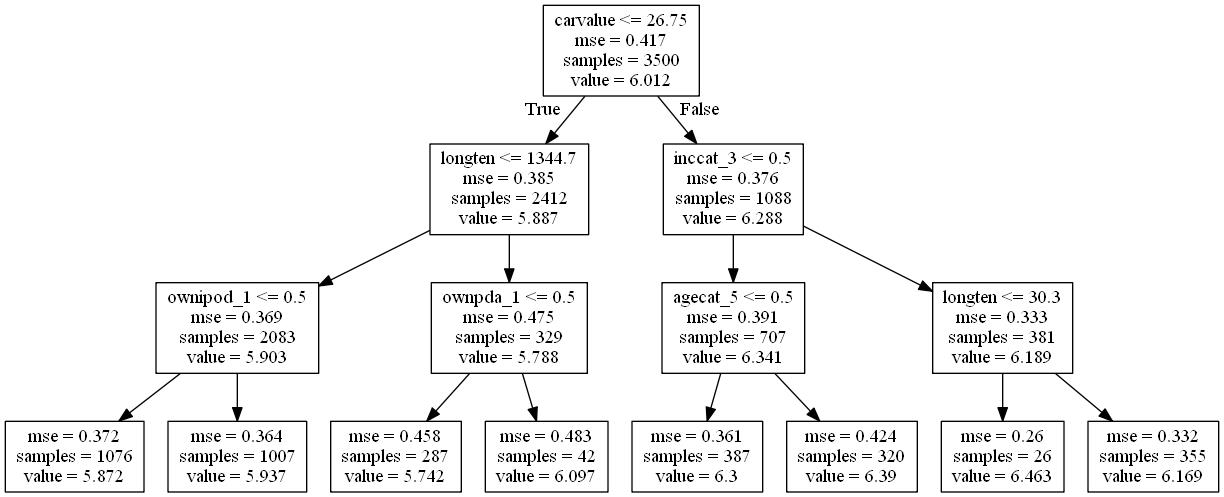

In [124]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='model_Dtree.jpg')

# 11. Ensemble Learning

# 11.1. Bagging

In [126]:
#Importing required packages
from sklearn.ensemble import BaggingRegressor

In [181]:
# model building
Tuning_bagging = {'n_estimators':[50,70,90,110,130]}

model_bagging = GridSearchCV(BaggingRegressor(),
                            Tuning_bagging,
                            n_jobs=-1,
                            cv=5,
                            verbose=10,
                            scoring='neg_mean_squared_error')

model_bagging = model_bagging.fit(train_x,train_y)
print('best combination:', model_bagging.best_params_)
print('best score      :', model_bagging.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:   41.6s remaining:   38.4s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:   53.7s remaining:   30.2s
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.2min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  1.4min remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished


best combination: {'n_estimators': 90}
best score      : -0.32506897807217794


In [182]:
# fitting model with best parametrs

model_bagging = BaggingRegressor(n_estimators=90)
model_bagging = model_bagging.fit(train_x, train_y)

In [183]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_bagging.predict(train_x))/train_y)
print('Train :',MAPE_train)
MAPE_test = np.mean(np.abs(test_y - model_bagging.predict(test_x))/test_y)
print('Test  :',MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_bagging.predict(train_x)))
print('Train :',RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_bagging.predict(test_x)))
print('Test  :',RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_bagging.predict(train_x))) 
print('Testing    : ',mean_squared_error(test_y,model_bagging.predict(test_x)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_bagging.predict(train_x))
Corr_test = stats.stats.pearsonr(test_y, model_bagging.predict(test_x))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
Train : 0.02834033740457566
Test  : 0.07796915008287156

RMSE values for training and testing data :
Train : 0.2111970638285434
Test  : 0.5725054542654243

MSE for Training and testing data sets:
Training   :  0.044604199769797834
Testing    :  0.32776249516365985

Correlation for Training and testing data set:
Training   :  (0.9760628849001192, 0.0)
Testing    :  (0.4564043860541206, 4.71576319738547e-78)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=583817715, splitter='best')
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.307825 to fit



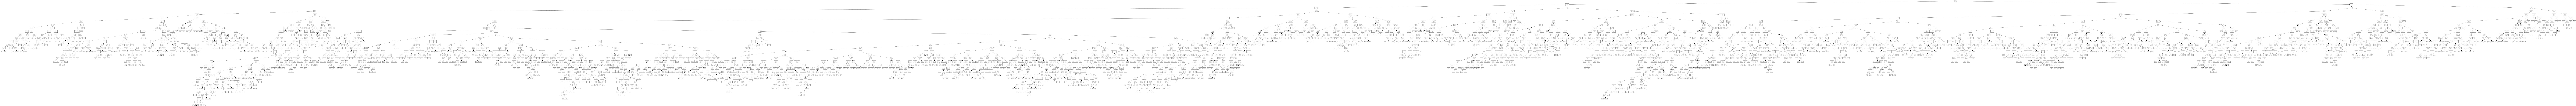

In [184]:
os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

# extract the single Tree
estimator = model_bagging.estimators_[89]
print(estimator)

# Exporting the tree output in the form opendocument
export_graphviz( estimator,
              out_file = "model_bagging.odt",
              feature_names = train_x.columns)

# read ODT file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_bagging.odt' )

# export the JPG tree image
chd_tree_graph.write_jpg( 'model_bagging.jpg' )

# show the JPG tree image
Image(filename='model_bagging.jpg')

# 11.2. Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
# model building
Tuning_Rforest = {'n_estimators': [20,30,50,60,70,80,90],
                 'max_depth':[5,6,7,8,9]}

model_Rforest = GridSearchCV(RandomForestRegressor(),
                            Tuning_Rforest,
                            cv=5,
                            verbose=10,
                            n_jobs=-1,
                            scoring='neg_mean_squared_error')

model_Rforest = model_Rforest.fit(train_x,train_y)
print('best combination:', model_Rforest.best_params_)
print('best score      :', model_Rforest.best_score_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

best combination: {'max_depth': 8, 'n_estimators': 90}
best score      : -0.3269427847903212


In [163]:
# fitting model with best params

model_Rforest = RandomForestRegressor(n_estimators=90, max_depth=8)
model_Rforest = model_Rforest.fit(train_x, train_y)

In [164]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_Rforest.predict(train_x))/train_y)
print('Train :',MAPE_train)
MAPE_test = np.mean(np.abs(test_y - model_Rforest.predict(test_x))/test_y)
print('Test  :',MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_Rforest.predict(train_x)))
print('Train :',RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_Rforest.predict(test_x)))
print('Test  :',RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_Rforest.predict(train_x))) 
print('Testing    : ',mean_squared_error(test_y,model_Rforest.predict(test_x)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_Rforest.predict(train_x))
Corr_test = stats.stats.pearsonr(test_y, model_Rforest.predict(test_x))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
Train : 0.0618036971142401
Test  : 0.07805944482609091

RMSE values for training and testing data :
Train : 0.45456334783989266
Test  : 0.5750502558572276

MSE for Training and testing data sets:
Training   :  0.20662783719941127
Testing    :  0.33068279676146284

Correlation for Training and testing data set:
Training   :  (0.7680301533009999, 0.0)
Testing    :  (0.45019199523314707, 9.668681772672368e-76)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1217174701, splitter='best')


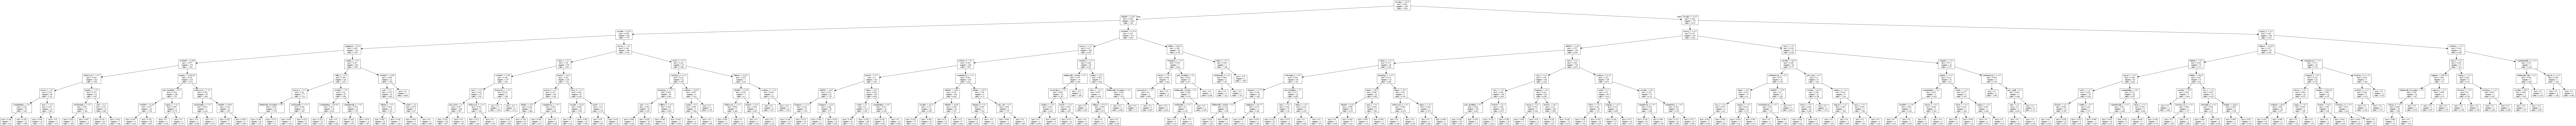

In [172]:
os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

# extract the single Tree
estimator = model_Rforest.estimators_[89]
print(estimator)

# Exporting the tree output in the form opendocument
export_graphviz( estimator,
              out_file = "model_Rforest.odt",
              feature_names = train_x.columns)

# read ODT file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_Rforest.odt' )

# export the JPG tree image
chd_tree_graph.write_jpg( 'model_Rforest.jpg' )

# show the JPG tree image
Image(filename='model_Rforest.jpg')

# 11.3. Boosting

# 11.3.1. ADA Boost

In [145]:
from sklearn.ensemble import AdaBoostRegressor

In [128]:
# model building

Tuning_ADAboost = {'n_estimators': [60,70,80,100,110,120,130],
                   'learning_rate': [10 ** x for x in range(-4, 2)]}

model_ADAboost = GridSearchCV(AdaBoostRegressor(),
                            Tuning_ADAboost,
                            cv=5,
                            verbose=10,
                            n_jobs=-1,
                            scoring='neg_mean_squared_error')

model_ADAboost = model_ADAboost.fit(train_x,train_y)
print('best combination:', model_ADAboost.best_params_)
print('best score      :', model_ADAboost.best_score_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3

best combination: {'learning_rate': 0.1, 'n_estimators': 130}
best score      : -0.3485554074582334


In [146]:
# fitting model with best params
model_ADAboost = AdaBoostRegressor(n_estimators=130, learning_rate=0.1)
model_ADAboost = model_ADAboost.fit(train_x,train_y)

In [147]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_ADAboost.predict(train_x))/train_y)
print('Train :',MAPE_train)
MAPE_test = np.mean(np.abs(test_y - model_ADAboost.predict(test_x))/test_y)
print('Test  :',MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_ADAboost.predict(train_x)))
print('Train :',RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_ADAboost.predict(test_x)))
print('Test  :',RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_ADAboost.predict(train_x))) 
print('Testing    : ',mean_squared_error(test_y,model_ADAboost.predict(test_x)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_ADAboost.predict(train_x))
Corr_test = stats.stats.pearsonr(test_y, model_ADAboost.predict(test_x))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
Train : 0.07793619092297206
Test  : 0.07961069611988288

RMSE values for training and testing data :
Train : 0.5782433819626372
Test  : 0.5899861878926895

MSE for Training and testing data sets:
Training   :  0.33436540878358834
Testing    :  0.3480837019041479

Correlation for Training and testing data set:
Training   :  (0.4712696849629516, 4.86117686319482e-193)
Testing    :  (0.40848791059656614, 2.0813427478592768e-61)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=817047303, splitter='best')


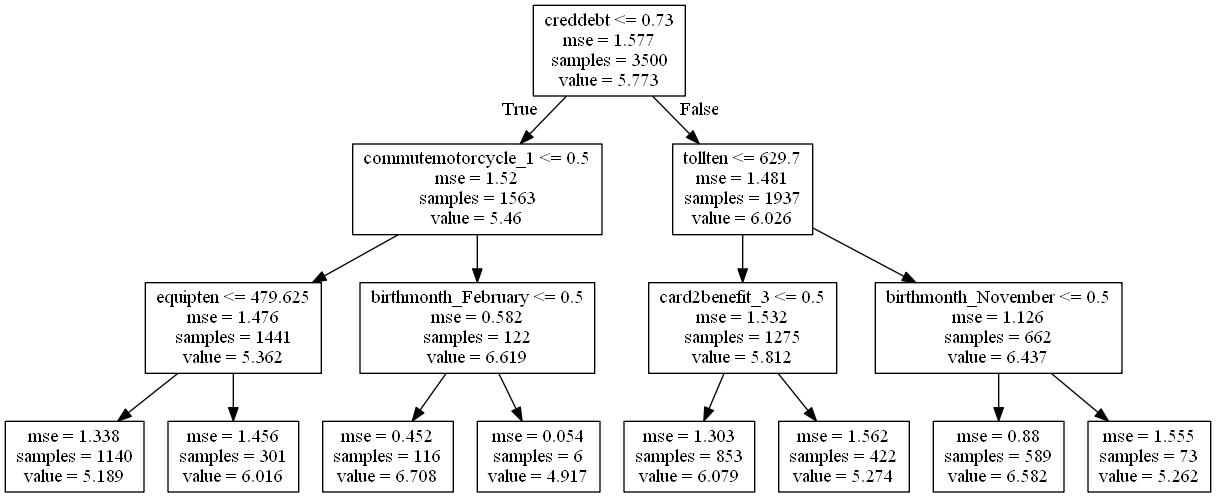

In [186]:
os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

# extract the single Tree
estimator = model_ADAboost.estimators_[129]
print(estimator)

# Exporting the tree output in the form opendocument
export_graphviz( estimator,
              out_file = "model_ADAboost.odt",
              feature_names = train_x.columns)

# read ODT file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_ADAboost.odt' )

# export the JPG tree image
chd_tree_graph.write_jpg( 'model_ADAboost.jpg' )

# show the JPG tree image
Image(filename='model_ADAboost.jpg')

# 11.3.2. Gradient Boost 

In [187]:
from sklearn.ensemble import GradientBoostingRegressor

In [133]:
# model building

Tuning_Gboost = {'n_estimators': [80,100,110,120,130],
               'max_depth':[2,3,4,5],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

model_Gboost = GridSearchCV(GradientBoostingRegressor(),
                            Tuning_Gboost,
                            cv=5,
                            verbose=10,
                            n_jobs=-1,
                            scoring='neg_mean_squared_error')

model_Gboost = model_Gboost.fit(train_x,train_y)
print('best combination:', model_Gboost.best_params_)
print('best score      :', model_Gboost.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3

best combination: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
best score      : -0.29752070479621223


In [188]:
# fitting model with best params
model_Gboost = GradientBoostingRegressor(n_estimators=100,max_depth=3,learning_rate=0.1)
model_Gboost = model_Gboost.fit(train_x,train_y)

In [189]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_Gboost.predict(train_x))/train_y)
print('Train :',MAPE_train)
MAPE_test = np.mean(np.abs(test_y - model_Gboost.predict(test_x))/test_y)
print('Test  :',MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_Gboost.predict(train_x)))
print('Train :',RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_Gboost.predict(test_x)))
print('Test  :',RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_Gboost.predict(train_x))) 
print('Testing    : ',mean_squared_error(test_y,model_Gboost.predict(test_x)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_Gboost.predict(train_x))
Corr_test = stats.stats.pearsonr(test_y, model_Gboost.predict(test_x))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
Train : 0.0658769629352213
Test  : 0.07553085454292736

RMSE values for training and testing data :
Train : 0.48729717139858636
Test  : 0.549893263539079

MSE for Training and testing data sets:
Training   :  0.23745853325306326
Testing    :  0.3023826012856589

Correlation for Training and testing data set:
Training   :  (0.6738428614437751, 0.0)
Testing    :  (0.5199138462983941, 1.224272264045788e-104)


# 11.3.3. XGboost

In [98]:
import xgboost

In [149]:
# model builing
Tuning_XGboost = {'n_estimators':[70,80,90,100,110,120],
                 'max_depth':[2,3,4,5,6]}

model_XGboost = GridSearchCV(estimator=xgboost.XGBRegressor(),
                            param_grid=Tuning_XGboost,
                            cv=5,
                            verbose=10,
                            n_jobs=-1,
                            scoring='neg_mean_squared_error')

model_XGboost = model_XGboost.fit(train_x,train_y)
print('best combination:', model_XGboost.best_params_)
print('best score      :', model_XGboost.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.0min finished


best combination: {'max_depth': 2, 'n_estimators': 80}
best score      : -0.29806780635553376


In [99]:
# fitting the model with best params
model_XGboost = xgboost.XGBRegressor(n_estimators=80,max_depth=2)
model_XGboost = model_XGboost.fit(train_x,train_y)

In [144]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_XGboost.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- model_XGboost.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_XGboost.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_XGboost.predict(test_x)))
print(RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_XGboost.predict(train_x))) 
print('Testing    : ',mean_squared_error(test_y,model_XGboost.predict(test_x)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_XGboost.predict(train_x))
Corr_test = stats.stats.pearsonr(test_y, model_XGboost.predict(test_x))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
0.0674143012612724
0.07533408764114151

RMSE values for training and testing data :
0.4978694915596988
0.5489155377383946

MSE for Training and testing data sets:
Training   :  0.24787403062591296
Testing    :  0.3013082675706309

Correlation for Training and testing data set:
Training   :  (0.646882360728503, 0.0)
Testing    :  (0.5220819628228429, 1.1951104045078555e-105)


# 12. K - nearest neighbours

In [101]:
#Importing required modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [102]:
#Standardising the data because KNN is distance based algorithm 
scaler = StandardScaler()
train_stdX = scaler.fit_transform(train_x)
test_stdX = scaler.fit_transform(test_x)

In [140]:
# model building
Tuning_KNN = {'n_neighbors':[3,5,7,9,11],
             'leaf_size': [20,30,40,50,60]}

model_KNN = GridSearchCV(KNeighborsRegressor(),
                        Tuning_KNN,
                        cv=5,
                        verbose=10,
                        n_jobs=-1,
                        scoring='neg_mean_squared_error')

model_KNN = model_KNN.fit(train_stdX,train_y)
print('best combination:', model_KNN.best_params_)
print('best score      :', model_KNN.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   22.7s


best combination: {'leaf_size': 20, 'n_neighbors': 11}
best score      : -0.3909794336919397


[Parallel(n_jobs=-1)]: Done 123 out of 125 | elapsed:   26.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   26.5s finished


In [103]:
# fitting model with best params

model_KNN = KNeighborsRegressor(leaf_size=20,n_neighbors=11)
model_KNN = model_KNN.fit(train_stdX,train_y)

In [145]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_KNN.predict(train_stdX))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- model_KNN.predict(test_stdX))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_KNN.predict(train_stdX)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_KNN.predict(test_stdX)))
print(RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_KNN.predict(train_stdX))) 
print('Testing    : ',mean_squared_error(test_y,model_KNN.predict(test_stdX)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_KNN.predict(train_stdX))
Corr_test = stats.stats.pearsonr(test_y, model_KNN.predict(test_stdX))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
0.07696435738615004
0.08483975758627384

RMSE values for training and testing data :
0.5679403222780347
0.6264344893561534

MSE for Training and testing data sets:
Training   :  0.32255620966927795
Testing    :  0.39242016945490477

Correlation for Training and testing data set:
Training   :  (0.48010621947214516, 2.661802152426697e-201)
Testing    :  (0.2636589390962735, 2.8329390667307928e-25)


# 13. SVM(Support Vector Machine) 

In [105]:
#Importing required modules
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

In [151]:
#Model building using Linear svm 
Tuning_SVM = {'C': [1,0.1,10],
                    'gamma':[0.0001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}

model_SVM = GridSearchCV(SVR(),
                        Tuning_SVM,
                        cv=3,
                        verbose=10,
                        n_jobs=-1,
                        scoring='neg_mean_squared_error')

model_SVM = model_SVM.fit(train_stdX,train_y)
print('best combination:', model_SVM.best_params_)
print('best score      :', model_SVM.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed: 19.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 27.6min finished


best combination: {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
best score      : -0.3102749090586519


In [107]:
# fitting model with best params
model_SVM = SVR(C=10, gamma=0.0001, kernel='linear')
model_SVM = model_SVM.fit(train_stdX,train_y)

In [146]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_SVM.predict(train_stdX))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- model_SVM.predict(test_stdX))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_SVM.predict(train_stdX)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_SVM.predict(test_stdX)))
print(RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_SVM.predict(train_stdX))) 
print('Testing    : ',mean_squared_error(test_y,model_SVM.predict(test_stdX)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_SVM.predict(train_stdX))
Corr_test = stats.stats.pearsonr(test_y, model_SVM.predict(test_stdX))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
0.06953822555222904
0.07584895396804574

RMSE values for training and testing data :
0.518546558812357
0.5478750191589427

MSE for Training and testing data sets:
Training   :  0.26889053365613724
Testing    :  0.3001670366184118

Correlation for Training and testing data set:
Training   :  (0.5982639098629925, 0.0)
Testing    :  (0.5322162940143923, 1.802203287719328e-110)


# 14. ANN(Artificial Neural Network)

In [109]:
#Importing required Module
from sklearn.neural_network import MLPRegressor

In [110]:
# model builing
Tuning_ANN = {'activation': ['relu','tanh','logistic','identity'],
               'alpha':[0.0001,0.001,0.01,1,10,]}

model_ANN = GridSearchCV(MLPRegressor(),
                        Tuning_ANN,
                        cv=3,
                        verbose=10,
                        n_jobs=-1,
                        scoring='neg_mean_squared_error')

model_ANN = model_ANN.fit(train_stdX,train_y)
print('best combination:', model_ANN.best_params_)
print('best score      :', model_ANN.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:  1.1min remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


best combination: {'activation': 'logistic', 'alpha': 1}
best score      : -0.30315811696506717


In [111]:
# fitting model with best params
model_ANN = MLPRegressor(activation='logistic', alpha=1.0)
model_ANN = model_ANN.fit(train_stdX,train_y)

In [149]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - model_ANN.predict(train_stdX))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- model_ANN.predict(test_stdX))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,model_ANN.predict(train_stdX)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,model_ANN.predict(test_stdX)))
print(RMSE_test)

#MSE for training and testing data sets
print("\nMSE for Training and testing data sets:")
print('Training   : ',mean_squared_error(train_y,model_ANN.predict(train_stdX))) 
print('Testing    : ',mean_squared_error(test_y,model_ANN.predict(test_stdX)))

#Accuracy metrics (c. Correlation)
print('\nCorrelation for Training and testing data set:')
Corr_train = stats.stats.pearsonr(train_y, model_ANN.predict(train_stdX))
Corr_test = stats.stats.pearsonr(test_y, model_ANN.predict(test_stdX))
print('Training   : ', Corr_train)
print('Testing    : ', Corr_test)

MAPE values for training and testing data :
0.0704314364860104
0.07537190028595035

RMSE values for training and testing data :
0.5181596833561855
0.5480910289329546

MSE for Training and testing data sets:
Training   :  0.26848945745578234
Testing    :  0.3004037759967848

Correlation for Training and testing data set:
Training   :  (0.5970993027075968, 0.0)
Testing    :  (0.5251590573254123, 4.27241116140961e-107)


# --------------------------------------------------------------------------------------------------------------